In [2]:
import sys
print(sys.version, sys.platform, sys.executable)

3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0] linux /home/sbuergers/spikeinterface/spikeinterface_new_api/venv/bin/python


In [3]:
# Establish filename

import os
import numpy as np

dir_name = r'/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint'
base_filename = 'axona_sample.set'
filename = os.path.join(dir_name, base_filename)

In [4]:
filename

'/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint/axona_sample.set'

In [5]:
from spikeextractors.extractors.neoextractors import AxonaRecordingExtractor

## AxonaRecordingExtractor --- .bin and .set data

In [1]:
re = AxonaRecordingExtractor(filename=filename)

NameError: name 'AxonaRecordingExtractor' is not defined

In [7]:
recording = re
print('Channel ids = {}'.format(recording.get_channel_ids()))
print('Num. channels = {}'.format(len(recording.get_channel_ids())))
print('Sampling frequency = {} Hz'.format(recording.get_sampling_frequency()))
print('Num. timepoints = {}'.format(recording.get_num_frames()))
#print('Stdev. on third channel = {}'.format(np.std(recording.get_traces(channel_ids=2))))
print('Location of third electrode = {}'.format(recording.get_channel_property(channel_id=2, property_name='location')))
print('Channel groups = {}'.format(recording.get_channel_groups()))

Channel ids = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Num. channels = 16
Sampling frequency = 48000.0 Hz
Num. timepoints = 57600
Location of third electrode = [nan nan]
Channel groups = [0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]


In [8]:
recording.neo_reader.header['signal_channels']

array([('1a', '0', 48000., 'int16', 'uV', 0.00457764, 0., '0'),
       ('1b', '1', 48000., 'int16', 'uV', 0.00457764, 0., '0'),
       ('1c', '2', 48000., 'int16', 'uV', 0.00457764, 0., '0'),
       ('1d', '3', 48000., 'int16', 'uV', 0.00457764, 0., '0'),
       ('2a', '4', 48000., 'int16', 'uV', 0.00228882, 0., '0'),
       ('2b', '5', 48000., 'int16', 'uV', 0.00228882, 0., '0'),
       ('2c', '6', 48000., 'int16', 'uV', 0.00228882, 0., '0'),
       ('2d', '7', 48000., 'int16', 'uV', 0.00228882, 0., '0'),
       ('3a', '8', 48000., 'int16', 'uV', 0.00305176, 0., '0'),
       ('3b', '9', 48000., 'int16', 'uV', 0.00305176, 0., '0'),
       ('3c', '10', 48000., 'int16', 'uV', 0.00305176, 0., '0'),
       ('3d', '11', 48000., 'int16', 'uV', 0.00305176, 0., '0'),
       ('4a', '12', 48000., 'int16', 'uV', 0.00305176, 0., '0'),
       ('4b', '13', 48000., 'int16', 'uV', 0.00305176, 0., '0'),
       ('4c', '14', 48000., 'int16', 'uV', 0.00305176, 0., '0'),
       ('4d', '15', 48000., 'int16'

In [9]:
re.get_channel_gains()

array([0.00457764, 0.00457764, 0.00457764, 0.00457764, 0.00228882,
       0.00228882, 0.00228882, 0.00228882, 0.00305176, 0.00305176,
       0.00305176, 0.00305176, 0.00305176, 0.00305176, 0.00305176,
       0.00305176])

In [10]:
re.get_traces()

array([[ 16.854858 , -17.715454 ,   0.       , ..., -62.713623 ,
        -65.963745 , -54.364014 ],
       [  7.8460693,  -0.8605957,   0.       , ..., -41.226196 ,
        -45.684814 , -43.496704 ],
       [ 47.973633 ,  24.298096 ,   0.       , ..., -38.726807 ,
        -33.26111  , -22.457886 ],
       ...,
       [-16.784668 ,  -0.6286621,   0.       , ..., -55.65796  ,
        -54.785156 , -47.027588 ],
       [  2.4353027, -28.192139 ,   0.       , ..., -52.15454  ,
        -40.722656 , -26.14746  ],
       [  7.25708  , -18.920898 ,   0.       , ..., -54.663086 ,
        -48.669434 , -34.65576  ]], dtype=float32)

In [11]:
def test_axonarecordingextractor(filename):
    '''
    '''
    re = AxonaRecordingExtractor(filename=filename)
    
    # TEST AXONARECORDINGEXTRACTOR
    # Retrieve some simple recording information and print it
    recording = re
    print('Channel ids = {}'.format(recording.get_channel_ids()))
    print('Num. channels = {}'.format(len(recording.get_channel_ids())))
    print('Sampling frequency = {} Hz'.format(recording.get_sampling_frequency()))
    print('Num. timepoints = {}'.format(recording.get_num_frames()))
    print('Stdev. on third channel = {}'.format(np.std(recording.get_traces(channel_ids=2))))
    print('Location of third electrode = {}'.format(recording.get_channel_property(channel_id=2, property_name='location')))
    print('Channel groups = {}'.format(recording.get_channel_groups()))
    
    # TEST NEO_READER (axonaio)
    print(recording.neo_reader.header['signal_channels'])

In [12]:
import os

# Data with both .bin and .X
dir_name = r'/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint'
base_filename = 'axona_sample'
print('====================', base_filename ,'====================')
test_axonarecordingextractor(os.path.join(dir_name, base_filename + '.set'))

# Data with only .X, example 1
dir_name = r'/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms'
base_filename = '20201004_Tint'
print('====================', base_filename ,'====================')
test_axonarecordingextractor(os.path.join(dir_name, base_filename + '.set'))

# Data with only .X, example 2
dir_name = r'/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_units/Axona_Unit_Mode_SmallFile'
base_filename = '20140815-180secs'
print('====================', base_filename ,'====================')
test_axonarecordingextractor(os.path.join(dir_name, base_filename + '.set'))

# Data with only .X, example 3
dir_name = r'/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint_no_bin'
base_filename = 'axona_sample'
print('====================', base_filename ,'====================')
test_axonarecordingextractor(os.path.join(dir_name, base_filename + '.set'))


==================== axona_sample ====================
Channel ids = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Num. channels = 16
Sampling frequency = 48000.0 Hz
Num. timepoints = 57600
Stdev. on third channel = 27.731016159057617
Location of third electrode = [nan nan]
Channel groups = [0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]
[('1a', '0', 48000., 'int16', 'uV', 0.00457764, 0., '0')
 ('1b', '1', 48000., 'int16', 'uV', 0.00457764, 0., '0')
 ('1c', '2', 48000., 'int16', 'uV', 0.00457764, 0., '0')
 ('1d', '3', 48000., 'int16', 'uV', 0.00457764, 0., '0')
 ('2a', '4', 48000., 'int16', 'uV', 0.00228882, 0., '0')
 ('2b', '5', 48000., 'int16', 'uV', 0.00228882, 0., '0')
 ('2c', '6', 48000., 'int16', 'uV', 0.00228882, 0., '0')
 ('2d', '7', 48000., 'int16', 'uV', 0.00228882, 0., '0')
 ('3a', '8', 48000., 'int16', 'uV', 0.00305176, 0., '0')
 ('3b', '9', 48000., 'int16', 'uV', 0.00305176, 0., '0')
 ('3c', '10', 48000., 'int16', 'uV', 0.00305176, 0., '0')
 ('3d', '11', 48000., 'int16', 'uV', 

AttributeError: 'NoneType' object has no attribute 'transpose'

## AxonaUnitRecordingExtractor --- .X and .set data

In [6]:
from neo.rawio import AxonaRawIO

In [7]:
from spikeextractors.extractors.axonaunitrecordingextractor import AxonaUnitRecordingExtractor

In [8]:
from spikeextractors.extractors.axonaunitrecordingextractor import AxonaUnitRecordingExtractor
import os


def test_axonaunitrecordingextractor(filename):
    '''
    '''
    re = AxonaUnitRecordingExtractor(filename=filename)
    
    # TEST AXONARECORDINGEXTRACTOR
    # Retrieve some simple recording information and print it
    recording = re
    print('Channel ids = {}'.format(recording.get_channel_ids()))
    print('Num. channels = {}'.format(len(recording.get_channel_ids())))
    print('Sampling frequency = {} Hz'.format(recording.get_sampling_frequency()))
    print('Num. timepoints = {}'.format(recording.get_num_frames()))
    print('Stdev. on third channel = {}'.format(np.std(recording.get_traces(channel_ids=2))))
    print('Location of third electrode = {}'.format(recording.get_channel_property(channel_id=2, property_name='location')))
    print('Channel groups = {}'.format(recording.get_channel_groups()))
    
    # TEST NEO_READER (axonaio)
    print(recording.neo_reader.header['signal_channels'])
    

# Data with both .bin and .X
dir_name = r'/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint'
base_filename = 'axona_sample'
print('====================', base_filename ,'====================')
test_axonaunitrecordingextractor(os.path.join(dir_name, base_filename + '.set'))

# Data with only .X, example 1
dir_name = r'/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms'
base_filename = '20201004_Tint'
print('====================', base_filename ,'====================')
test_axonaunitrecordingextractor(os.path.join(dir_name, base_filename + '.set'))

# Data with only .X, example 2
dir_name = r'/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_2ms'
base_filename = '20201004_Tint'
print('====================', base_filename ,'====================')
test_axonaunitrecordingextractor(os.path.join(dir_name, base_filename + '.set'))

# Data with only .X, example 3
dir_name = r'/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_units/Axona_Unit_Mode_SmallFile'
base_filename = '20140815-180secs'
print('====================', base_filename ,'====================')
test_axonaunitrecordingextractor(os.path.join(dir_name, base_filename + '.set'))

# Data with only .X, example 4
dir_name = r'/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint_no_bin'
base_filename = 'axona_sample'
print('====================', base_filename ,'====================')
test_axonaunitrecordingextractor(os.path.join(dir_name, base_filename + '.set'))


==================== axona_sample ====================
Channel ids = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Num. channels = 16
Sampling frequency = 48000 Hz
Num. timepoints = 57600
Stdev. on third channel = 12.506070137023926
Location of third electrode = [nan nan]
Channel groups = [0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]
[('1a', '0', 48000., 'int16', 'uV', 0.00457764, 0., '0')
 ('1b', '1', 48000., 'int16', 'uV', 0.00457764, 0., '0')
 ('1c', '2', 48000., 'int16', 'uV', 0.00457764, 0., '0')
 ('1d', '3', 48000., 'int16', 'uV', 0.00457764, 0., '0')
 ('2a', '4', 48000., 'int16', 'uV', 0.00228882, 0., '0')
 ('2b', '5', 48000., 'int16', 'uV', 0.00228882, 0., '0')
 ('2c', '6', 48000., 'int16', 'uV', 0.00228882, 0., '0')
 ('2d', '7', 48000., 'int16', 'uV', 0.00228882, 0., '0')
 ('3a', '8', 48000., 'int16', 'uV', 0.00305176, 0., '0')
 ('3b', '9', 48000., 'int16', 'uV', 0.00305176, 0., '0')
 ('3c', '10', 48000., 'int16', 'uV', 0.00305176, 0., '0')
 ('3d', '11', 48000., 'int16', 'uV', 0.

In [16]:
recording = AxonaUnitRecordingExtractor(filename=filename)

recording.get_traces(return_scaled=False).transpose().shape

(57600, 16)

In [9]:
def test_axonaunitrecordingextractor(filename):
    '''
    '''
    re = AxonaUnitRecordingExtractor(filename=filename)
    
    # TEST AXONARECORDINGEXTRACTOR
    # Retrieve some simple recording information and print it
    recording = re
    print('Channel ids = {}'.format(recording.get_channel_ids()))
    print('Num. channels = {}'.format(len(recording.get_channel_ids())))
    print('Sampling frequency = {} Hz'.format(recording.get_sampling_frequency()))
    print('Num. timepoints = {}'.format(recording.get_num_frames()))
    print('Stdev. on third channel = {}'.format(np.std(recording.get_traces(channel_ids=2))))
    print('Location of third electrode = {}'.format(recording.get_channel_property(channel_id=2, property_name='location')))
    print('Channel groups = {}'.format(recording.get_channel_groups()))
    
    # TEST NEO_READER (axonaio)
    print(recording.neo_reader.header['signal_channels'])
    


In [17]:
import os

# Data with both .bin and .X
dir_name = r'/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint'
base_filename = 'axona_sample'
print('====================', base_filename ,'====================')
test_axonaunitrecordingextractor(os.path.join(dir_name, base_filename + '.set'))

# Data with only .X, example 1
dir_name = r'/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms'
base_filename = '20201004_Tint'
print('====================', base_filename ,'====================')
test_axonaunitrecordingextractor(os.path.join(dir_name, base_filename + '.set'))

# Data with only .X, example 2
dir_name = r'/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_units/Axona_Unit_Mode_SmallFile'
base_filename = '20140815-180secs'
print('====================', base_filename ,'====================')
test_axonaunitrecordingextractor(os.path.join(dir_name, base_filename + '.set'))

# Data with only .X, example 3
dir_name = r'/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint_no_bin'
base_filename = 'axona_sample'
print('====================', base_filename ,'====================')
test_axonaunitrecordingextractor(os.path.join(dir_name, base_filename + '.set'))


==================== axona_sample ====================
Channel ids = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Num. channels = 16
Sampling frequency = 48000 Hz
Num. timepoints = 57600
Stdev. on third channel = 12.504105567932129
Location of third electrode = [nan nan]
Channel groups = [0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]
[('1a', '0', 48000., 'int16', 'uV', 0.00457764, 0., '0')
 ('1b', '1', 48000., 'int16', 'uV', 0.00457764, 0., '0')
 ('1c', '2', 48000., 'int16', 'uV', 0.00457764, 0., '0')
 ('1d', '3', 48000., 'int16', 'uV', 0.00457764, 0., '0')
 ('2a', '4', 48000., 'int16', 'uV', 0.00228882, 0., '0')
 ('2b', '5', 48000., 'int16', 'uV', 0.00228882, 0., '0')
 ('2c', '6', 48000., 'int16', 'uV', 0.00228882, 0., '0')
 ('2d', '7', 48000., 'int16', 'uV', 0.00228882, 0., '0')
 ('3a', '8', 48000., 'int16', 'uV', 0.00305176, 0., '0')
 ('3b', '9', 48000., 'int16', 'uV', 0.00305176, 0., '0')
 ('3c', '10', 48000., 'int16', 'uV', 0.00305176, 0., '0')
 ('3d', '11', 48000., 'int16', 'uV', 0.

In [18]:
rawio_works = AxonaRawIO(
    filename='/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint/axona_sample.set')
rawio_works.parse_header()

In [15]:
rawio_works.file_parameters['set']['sampling_rate']

48000

In [17]:
sr = rawio_works.file_parameters['set']['sampling_rate']
int(rawio_works.file_parameters['unit']['duration']) * sr

28848000

In [18]:
rawio_works.file_parameters['bin']['num_total_samples']

57600

In [36]:
filename = os.path.join(dir_name, base_filename + '.set')
print(filename)

/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms/20201004_Tint.set


In [39]:
rawio = AxonaRawIO(filename=filename)

In [46]:
rawio

AxonaRawIO: /mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms/20201004_Tint

In [68]:
rawio_works.header['signal_streams']

array([('stream 0', '0')], dtype=[('name', '<U64'), ('id', '<U64')])

In [67]:
rawio.parse_header()
rawio.header['signal_streams']

array([], dtype=[('name', '<U64'), ('id', '<U64')])

In [63]:
rawio.signal_streams_count()

0

In [66]:
rawio.get_group_channel_indexes()

AttributeError: 'AxonaRawIO' object has no attribute 'get_group_channel_indexes'

In [37]:
ue = AxonaUnitRecordingExtractor(filename=filename)

AssertionError: This file have several signal streams spikeextractors support only one streamsMaybe you can use option to select only one stream

In [13]:
recording = ue
print('Channel ids = {}'.format(recording.get_channel_ids()))
print('Num. channels = {}'.format(len(recording.get_channel_ids())))
print('Sampling frequency = {} Hz'.format(recording.get_sampling_frequency()))
print('Num. timepoints = {}'.format(recording.get_num_frames()))
#print('Stdev. on third channel = {}'.format(np.std(recording.get_traces(channel_ids=2))))
print('Location of third electrode = {}'.format(recording.get_channel_property(channel_id=2, property_name='location')))
print('Channel groups = {}'.format(recording.get_channel_groups()))

Channel ids = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Num. channels = 16
Sampling frequency = 48000 Hz
Num. timepoints = 57600
Location of third electrode = [nan nan]
Channel groups = [0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]


In [14]:
ue._channel_ids

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [15]:
ue.get_num_frames()

57600

In [10]:
ue.get_num_samples()

AttributeError: 'AxonaUnitRecordingExtractor' object has no attribute 'get_num_samples'

In [21]:
channel_ids = ['1', '2', '3']

In [22]:
ue.neo_reader.file_parameters['unit']

{'data_type': dtype([('spiketimes', '>i4'), ('samples', 'i1', (50,))]),
 'tetrode_ids': [1, 2, 3, 4],
 'header_encoding': 'cp1252',
 1: {'num_spikes': 159,
  'filename': PosixPath('/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint/axona_sample.1'),
  'header_size': 286},
 2: {'num_spikes': 59,
  'filename': PosixPath('/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint/axona_sample.2'),
  'header_size': 285},
 3: {'num_spikes': 126,
  'filename': PosixPath('/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint/axona_sample.3'),
  'header_size': 286},
 4: {'num_spikes': 96,
  'filename': PosixPath('/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint/axona_sample.4'),
  'header_size': 285},
 'trial_date': 'Sunday, 4 Oct 2020',
 'trial_time': '11:07:07',
 'experimenter': 'Abid',
 'comments': '',
 'duration': '601',
 'sw_version': '1.2.2.16',
 'num_chans': 4,
 'timebase': '96000 hz',
 'bytes_per

In [18]:
ue._get_tetrode_channel_table(channel_ids)

NameError: name 'ue' is not defined

In [24]:
ue.get_traces(channel_ids=channel_ids)

array([[ 5.82326143e-01,  1.50979368e+00,  1.01306579e+00],
       [-2.52424619e-01,  3.14001339e+00,  1.45118559e+00],
       [ 2.04500084e-01,  6.83728045e+00,  9.55637117e-01],
       ...,
       [-5.48513999e-02,  1.45252914e+00,  1.58704156e-01],
       [-5.24182931e+00,  8.51444863e+00, -6.37102964e-03],
       [-2.70285039e+00,  1.39221096e+00,  8.08949563e-01]])

## Compare AxonaUnitRecordingExtractor with new and old API

In [25]:
import os

import numpy as np

dir_name = r'/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint'
base_filename = 'axona_sample.set'
filename = os.path.join(dir_name, base_filename)

In [26]:
channel_ids = ['1', '2', '3']

In [27]:
from spikeinterface.extractors.neoextractors.axona import AxonaUnitRecordingExtractor
from spikeextractors.extractors.axonaunitrecordingextractor import AxonaUnitRecordingExtractor as AURE_old_api

ue_old_api = AURE_old_api(filename=filename, noise_std=0)
ue = AxonaUnitRecordingExtractor(file_path=filename, noise_std=0)

# Get waveforms for comparison with AxonaUnitRecordingExtractor.get_traces
waveforms = ue.neo_reader._get_spike_raw_waveforms(
    block_index=0,
    seg_index=0,
    unit_index=0,
    t_start=None,
    t_stop=None
)

# Get time stamps of waveforms to look in the right place in AxonaUnitRecordingExtractor.get_traces
spike_times = ue.neo_reader._get_spike_timestamps(
    block_index=0,
    seg_index=0,
    unit_index=0,
    t_start=None,
    t_stop=None
)

for i in range(len(spike_times)):

    spike_time = spike_times[i] // 2
    print('Spike {}, extracting waveform between samples {}-{}'.format(i, spike_time-10, spike_time+40))

    # Get waveforms for spikeextractor and spikeinterface axona api
    traces = ue.get_traces(
        start_frame=spike_time - 10,
        end_frame=spike_time + 40,
        channel_ids=channel_ids
    )

    traces_old_api = ue_old_api.get_traces(
        start_frame=spike_time - 10,
        end_frame=spike_time + 40,
        channel_ids=[int(ch) for ch in channel_ids],
        return_scaled=False
    )

    # Make sure arrays have the same data type
    neo_waves = np.array(waveforms[i, 1:4, :], dtype=np.float32)
    spikeinterface_waves = np.array(traces, dtype=np.float32)
    spikeextractors_waves = np.array(traces_old_api, dtype=np.float32)

    # Are they equal?
    assert np.array_equal(neo_waves, spikeinterface_waves, equal_nan=False)
    assert np.array_equal(neo_waves, spikeextractors_waves, equal_nan=False)
    assert np.array_equal(spikeinterface_waves, spikeextractors_waves, equal_nan=False)

Spike 0, extracting waveform between samples 454-504


AssertionError: 

In [ ]:
spikeextractors_waves

In [28]:
spikeinterface_waves

array([[ -6.,  -2., -18.],
       [ -2.,   3.,  -6.],
       [  1.,  14.,  13.],
       [  8.,  26.,  32.],
       [ 20.,  35.,  43.],
       [ 30.,  36.,  42.],
       [ 37.,  32.,  37.],
       [ 44.,  30.,  34.],
       [ 52.,  32.,  38.],
       [ 60.,  37.,  48.],
       [ 60.,  37.,  53.],
       [ 47.,  32.,  48.],
       [ 27.,  26.,  40.],
       [ 10.,  21.,  37.],
       [  0.,  16.,  36.],
       [ -5.,   2.,  30.],
       [-16., -20.,  14.],
       [-31., -45.,  -2.],
       [-41., -56.,  -8.],
       [-40., -50.,   1.],
       [-31., -31.,  20.],
       [-21.,  -9.,  37.],
       [-14.,   6.,  50.],
       [ -9.,  12.,  59.],
       [ -7.,  12.,  58.],
       [ -5.,  12.,  41.],
       [  0.,  13.,  11.],
       [  4.,  11., -22.],
       [  6.,   6., -46.],
       [  3.,   0., -56.],
       [ -6.,  -8., -53.],
       [-20., -14., -40.],
       [-31., -12., -22.],
       [-31.,  -2.,  -3.],
       [-21.,  10.,  12.],
       [ -8.,  19.,  18.],
       [  0.,  19.,  14.],
 

In [29]:
neo_waves

array([[ -6.,  -2.,   1.,   8.,  20.,  30.,  37.,  44.,  52.,  60.,  60.,
         47.,  27.,  10.,   0.,  -5., -16., -31., -41., -40., -31., -21.,
        -14.,  -9.,  -7.,  -5.,   0.,   4.,   6.,   3.,  -6., -20., -31.,
        -31., -21.,  -8.,   0.,   2.,  -2.,  -8.,  -9.,  -3.,   4.,   8.,
          9.,  13.,  20.,  25.,  25.,  22.],
       [ -2.,   3.,  14.,  26.,  35.,  36.,  32.,  30.,  32.,  37.,  37.,
         32.,  26.,  21.,  16.,   2., -20., -45., -56., -50., -31.,  -9.,
          6.,  12.,  12.,  12.,  13.,  11.,   6.,   0.,  -8., -14., -12.,
         -2.,  10.,  19.,  19.,   9.,  -5., -18., -24., -21., -12.,   0.,
         10.,  20.,  28.,  30.,  24.,  14.],
       [-18.,  -6.,  13.,  32.,  43.,  42.,  37.,  34.,  38.,  48.,  53.,
         48.,  40.,  37.,  36.,  30.,  14.,  -2.,  -8.,   1.,  20.,  37.,
         50.,  59.,  58.,  41.,  11., -22., -46., -56., -53., -40., -22.,
         -3.,  12.,  18.,  14.,   2., -13., -22., -24., -19., -11.,  -1.,
         10.,  20.,  2

## Further tests AxonaRecordingExtractor

In [30]:
# Run tests in command line... the line below crashes in the nb, but I can run the test fine in vscode

In [31]:
!python3 -m unittest ~/spikeinterface/spikeinterface_new_api/spikeinterface/spikeinterface/extractors/tests/test_neoextractors.AxonaRecordingTest

E
ERROR: /home/sbuergers/spikeinterface/spikeinterface_new_api/spikeinterface/spikeinterface/extractors/tests/test_neoextractors (unittest.loader._FailedTest)
----------------------------------------------------------------------
ImportError: Failed to import test module: /home/sbuergers/spikeinterface/spikeinterface_new_api/spikeinterface/spikeinterface/extractors/tests/test_neoextractors
Traceback (most recent call last):
  File "/home/sbuergers/conda/lib/python3.8/unittest/loader.py", line 154, in loadTestsFromName
    module = __import__(module_name)
ModuleNotFoundError: No module named '/home/sbuergers/spikeinterface/spikeinterface_new_api/spikeinterface/spikeinterface/extractors/tests/test_neoextractors'


----------------------------------------------------------------------
Ran 1 test in 0.000s

FAILED (errors=1)


In [32]:
rec = AxonaRecordingExtractor(file_path=filename)

In [33]:
segment_index = 0
rec._check_segment_index(segment_index)

0

In [36]:
start_frame = None
end_frame = None
channel_ids = None
order = None
return_scaled = False

segment_index = rec._check_segment_index(segment_index)
channel_indices = rec.ids_to_indices(channel_ids, prefer_slice=False)
rs = rec._recording_segments[segment_index]
traces = rs.get_traces(start_frame=start_frame, end_frame=end_frame, channel_indices=channel_indices)
if order is not None:
    traces = np.asanyarray(traces, order=order)
if return_scaled:
    gains = rec.get_property('gain_to_uV')
    offsets = rec.get_property('offset_to_uV')
    if gains is None or offsets is None:
        raise ValueError('This recording do not support return_scaled=True (need gain_to_uV and offset_to_uV properties)')
    gains = gains[channel_indices].astype('float32')
    offsets = offsets[channel_indices].astype('float32')
    traces = traces.astype('float32') * gains + offsets

In [37]:
full_traces = rec.get_traces(segment_index=segment_index)

In [38]:
full_traces

array([[  3682,   1714,  10480, ...,  -5500,    798,   2378],
       [ -3870,   -188,   5308, ...,   -206,  -9238,  -6200],
       [     0,      0,      0, ...,      0,      0,      0],
       ...,
       [-13700,  -9006,  -8460, ..., -18238, -17090, -17912],
       [-14410,  -9980,  -7266, ..., -17952, -13344, -15948],
       [-11876,  -9502,  -4906, ..., -15410,  -8568, -11356]], dtype=int16)

## Further tests AxonaUnitRecordingExtractor

In [13]:
ue = AxonaUnitRecordingExtractor(file_path=filename)

In [14]:
ue.get_num_segments()

1

In [15]:
ue.neo_reader.get_analogsignal_chunk()

array([[  3682,   1714,  10480, ...,  -5500,    798,   2378],
       [ -3870,   -188,   5308, ...,   -206,  -9238,  -6200],
       [     0,      0,      0, ...,      0,      0,      0],
       ...,
       [-13700,  -9006,  -8460, ..., -18238, -17090, -17912],
       [-14410,  -9980,  -7266, ..., -17952, -13344, -15948],
       [-11876,  -9502,  -4906, ..., -15410,  -8568, -11356]], dtype=int16)

In [16]:
ue.neo_reader.header['signal_streams']['id'][0]

'0'

In [17]:
full_traces.shape

NameError: name 'full_traces' is not defined

In [18]:
(num_samples, num_chans)

NameError: name 'num_samples' is not defined

In [19]:
full_traces.dtype

NameError: name 'full_traces' is not defined

In [20]:
dtype

NameError: name 'dtype' is not defined

In [21]:
ful

NameError: name 'ful' is not defined

In [23]:
dtype

dtype('int16')

In [25]:
full_traces.dtype

dtype('float64')

In [22]:
rec = ue
# print(rec)

num_seg = rec.get_num_segments()
num_chans = rec.get_num_channels()
dtype = rec.get_dtype()

for segment_index in range(num_seg):
    num_samples = rec.get_num_samples(segment_index=segment_index)

    full_traces = rec.get_traces(segment_index=segment_index)
    assert full_traces.shape == (num_samples, num_chans)
    assert full_traces.dtype == dtype


    traces_sample_first = rec.get_traces(segment_index=segment_index, start_frame=0, end_frame=1)
    assert traces_sample_first.shape == (1, num_chans)
    assert np.all(full_traces[0, :] == traces_sample_first[0, :])

    traces_sample_last = rec.get_traces(segment_index=segment_index, start_frame=num_samples-1, end_frame=num_samples)
    assert traces_sample_last.shape == (1, num_chans)
    assert np.all(full_traces[-1, :] == traces_sample_last[0, :])

# try return_scaled
if isinstance(rec, NeoBaseRecordingExtractor):
    assert rec.get_property('gain_to_uV') is not None
    assert rec.get_property('offset_to_uV') is not None

if rec.get_property('gain_to_uV') is not None and rec.get_property('offset_to_uV') is not None:
    trace_scaled = rec.get_traces(segment_index=segment_index, return_scaled=True)
    assert trace_scaled.dtype == 'float32'

AssertionError: 

In [47]:
set_file_string = \
    '/home/sbuergers/spikeinterface_datasets/ephy_testing_data/axona/dataset_unit_spikes/20140815-180secs.set'

ue = AxonaUnitRecordingExtractor(file_path=set_file_string, noise_std=0)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [49]:
set_file_string = \
    '/home/sbuergers/spikeinterface_datasets/ephy_testing_data/axona/dataset_multi_modal/axona_sample.set'

ue = AxonaUnitRecordingExtractor(file_path=set_file_string, noise_std=0)

In [55]:
ue.neo_reader._get_channel_indexes(stream_index=0, channel_indexes=None, channel_names=None, channel_ids=None)

In [80]:
ue.neo_reader.raw_annotations['blocks'][0]['segments'][0]['signals'][0]['__array_annotations__']['channel_ids']

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15'], dtype='<U2')

In [57]:
ue.neo_reader._repr_annotations

<bound method BaseRawIO._repr_annotations of AxonaRawIO: /home/sbuergers/spikeinterface_datasets/ephy_testing_data/axona/dataset_multi_modal/axona_sample
nb_block: 1
nb_segment:  [1]
signal_streams: [stream 0 (chans: 16)]
signal_channels: [1a, 1b, 1c, 1d ... 4a , 4b , 4c , 4d]
spike_channels: [tetrode 1, tetrode 2, tetrode 3, tetrode 4]
event_channels: []
>

In [30]:
# Below: Old code

In [31]:
import pathlib

In [32]:
filename

'/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint/axona_sample.set'

In [33]:
fn = pathlib.Path(filename).with_suffix('')
fn

PosixPath('/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint/axona_sample')

In [34]:
set_file = fn.with_suffix('.set')
set_file

PosixPath('/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint/axona_sample.set')

In [35]:
set_file.exists()

True

In [36]:
set_file_string = '/home/sbuergers/spikeinterface_datasets/ephy_testing_data/axona/dataset_unit_spikes/20140815-180secs.set'

In [38]:
ue = AxonaUnitRecordingExtractor(file_path=set_file_string, noise_std=0)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [17]:
!ls /home/sbuergers/spikeinterface_datasets/ephy_testing_data/axona/dataset_unit_spikes

20140815-180secs.1  20140815-180secs.4	  20140815-180secs.set
20140815-180secs.2  20140815-180secs.eeg
20140815-180secs.3  20140815-180secs.pos


In [18]:
fn_test = pathlib.Path(set_file_string).with_suffix('')

In [19]:
fn_test

PosixPath('/home/sbuergers/spikeinterface_datasets/ephy_testing_data/axona/dataset_unit_spikes/20140815-180secs')

In [20]:
fn_set = fn_test.with_suffix('.set')
fn_set

PosixPath('/home/sbuergers/spikeinterface_datasets/ephy_testing_data/axona/dataset_unit_spikes/20140815-180secs.set')

In [21]:
fn_set.exists()

True

In [22]:
ue.get_num_segments()

NameError: name 'ue' is not defined

In [34]:
import neo

from spikeinterface.core import (BaseRecording, BaseSorting, BaseEvent,
                                 BaseRecordingSegment, BaseSortingSegment, BaseEventSegment)

In [12]:
stream_id=None

# From NeoBaseExtractor
NeoRawIOClass = 'AxonaRawIO'
installed = True
is_writable = False

neoIOclass = eval('neo.rawio.' + NeoRawIOClass)
self = 
self.neo_reader = neoIOclass(filename=filename)
self.neo_reader.parse_header()

assert self.neo_reader.block_count() == 1, \
    'This file is neo multi block spikeinterface support one block only dataset'

# From NeoBaseRecordingExtractor
stream_channels = self.neo_reader.header['signal_streams']
stream_ids = stream_channels['id']
if stream_id is None:
    if stream_channels.size > 1:
        raise ValueError(f'This reader have several streams({stream_ids}), specify it with stream_id=')
    else:
        stream_id = stream_ids[0]
else:
    assert stream_id in stream_ids, f'stream_id {stream_id} is no in {stream_ids}'

self.stream_index = list(stream_ids).index(stream_id)
self.stream_id = stream_id

# need neo 0.10.0
signal_channels = self.neo_reader.header['signal_channels']
mask = signal_channels['stream_id'] == stream_id
signal_channels = signal_channels[mask]

# check channel groups
chan_ids = signal_channels['id']
raw_dtypes = signal_channels['dtype']

sampling_frequency = self.neo_reader.get_signal_sampling_rate(stream_index=self.stream_index)
dtype = signal_channels['dtype'][0]
BaseRecording.__init__(self, sampling_frequency, chan_ids, dtype)

SyntaxError: invalid syntax (<ipython-input-12-60ec5dc29426>, line 9)

In [34]:
signal_channels

array([('1a', '0', 48000., "<class 'numpy.in", 'uV', 1.171875 , 0., '0'),
       ('1b', '1', 48000., "<class 'numpy.in", 'uV', 1.171875 , 0., '0'),
       ('1c', '2', 48000., "<class 'numpy.in", 'uV', 1.171875 , 0., '0'),
       ('1d', '3', 48000., "<class 'numpy.in", 'uV', 1.171875 , 0., '0'),
       ('2a', '4', 48000., "<class 'numpy.in", 'uV', 0.5859375, 0., '0'),
       ('2b', '5', 48000., "<class 'numpy.in", 'uV', 0.5859375, 0., '0'),
       ('2c', '6', 48000., "<class 'numpy.in", 'uV', 0.5859375, 0., '0'),
       ('2d', '7', 48000., "<class 'numpy.in", 'uV', 0.5859375, 0., '0'),
       ('3a', '8', 48000., "<class 'numpy.in", 'uV', 0.78125  , 0., '0'),
       ('3b', '9', 48000., "<class 'numpy.in", 'uV', 0.78125  , 0., '0'),
       ('3c', '10', 48000., "<class 'numpy.in", 'uV', 0.78125  , 0., '0'),
       ('3d', '11', 48000., "<class 'numpy.in", 'uV', 0.78125  , 0., '0'),
       ('4a', '12', 48000., "<class 'numpy.in", 'uV', 0.78125  , 0., '0'),
       ('4b', '13', 48000., "<class

In [33]:
dtype

"<class 'numpy.in"

In [17]:
re = AxonaRecordingExtractor(filename=filename)

TypeError: data type "<class 'numpy.in" not understood

In [11]:
print('Channel ids = {}'.format(recording.get_channel_ids()))
print('Num. channels = {}'.format(len(recording.get_channel_ids())))
print('Sampling frequency = {} Hz'.format(recording.get_sampling_frequency()))
print('Num. timepoints = {}'.format(recording.get_num_frames()))
#print('Stdev. on third channel = {}'.format(np.std(recording.get_traces(channel_ids=2))))
print('Location of third electrode = {}'.format(recording.get_channel_property(channel_id=2, property_name='location')))
print('Channel groups = {}'.format(recording.get_channel_groups()))

NameError: name 'recording' is not defined

Try to get to `seg_ann['signals'][0]['__array_annotations__']['tetrode_id']`, defined in axonarawio for python-neo

In [ ]:
from neo import AxonaIO

In [18]:
axneo = AxonaIO(filename=filename)

In [19]:
axneo.raw_annotations['blocks'][0]['segments'][0]['signals'][0]['__array_annotations__']['channel_names']

array(['1a', '1b', '1c', '1d', '2a', '2b', '2c', '2d', '3a', '3b', '3c',
       '3d', '4a', '4b', '4c', '4d'], dtype='<U2')

In [20]:
axneo.raw_annotations['blocks'][0]['segments'][0]['signals'][0]['__array_annotations__']['channel_ids']

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15'], dtype='<U2')

In [21]:
axneo.raw_annotations

{'blocks': [{'file_origin': '../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_raw/20201004_Raw.set',
   'segments': [{'file_origin': '../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_raw/20201004_Raw.set',
     'signals': [{'name': 'stream 0',
       'stream_id': '0',
       'file_origin': '../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_raw/20201004_Raw.set',
       '__array_annotations__': {'channel_names': array(['1a', '1b', '1c', '1d', '2a', '2b', '2c', '2d', '3a', '3b', '3c',
               '3d', '4a', '4b', '4c', '4d'], dtype='<U2'),
        'channel_ids': array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
               '13', '14', '15'], dtype='<U2'),
        'tetrode_id': [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]}}],
     'spikes': [],
     'events': [],
     'rec_datetime': datetime.datetime(2020, 10, 4, 11, 7, 7)}]}]}

In [22]:
'''
from spikeextractors.extractors.neoextractors.neobaseextractor import NeoBaseRecordingExtractor

try:
    import neo

    HAVE_NEO = True
except ImportError:
    HAVE_NEO = False


class AxonaRecordingExtractor(NeoBaseRecordingExtractor):
    extractor_name = 'AxonaRecording'
    mode = 'file'
    NeoRawIOClass = 'AxonaRawIO'

    def __init__(self, **kargs):
        NeoBaseRecordingExtractor.__init__(self, **kargs)
        
        # Read channel groups by tetrode IDs
        self._key_properties['group'] = self.neo_reader.\
            raw_annotations['blocks'][0]['segments'][0]['signals']\
                           [0]['__array_annotations__']['tetrode_id']

        # Enforce 0-based indexing in spikeextractors
        self._key_properties['group'] = [el-1 for el in self._key_properties['group']]
        self._channel_ids = [el-1 for el in self._channel_ids]

        header_channels = self.neo_reader.header['signal_channels'][slice(None)]

        gains = header_channels['gain'] * self.additional_gain[0]
        self.set_channel_gains(gains=gains, channel_ids=self._channel_ids)

        names = header_channels['name']
        for i, ind in enumerate(self._channel_ids):
            self.set_channel_property(channel_id=ind, property_name='name', value=names[i])
'''

"\nfrom spikeextractors.extractors.neoextractors.neobaseextractor import NeoBaseRecordingExtractor\n\ntry:\n    import neo\n\n    HAVE_NEO = True\nexcept ImportError:\n    HAVE_NEO = False\n\n\nclass AxonaRecordingExtractor(NeoBaseRecordingExtractor):\n    extractor_name = 'AxonaRecording'\n    mode = 'file'\n    NeoRawIOClass = 'AxonaRawIO'\n\n    def __init__(self, **kargs):\n        NeoBaseRecordingExtractor.__init__(self, **kargs)\n        \n        # Read channel groups by tetrode IDs\n        self._key_properties['group'] = self.neo_reader.            raw_annotations['blocks'][0]['segments'][0]['signals']                           [0]['__array_annotations__']['tetrode_id']\n\n        # Enforce 0-based indexing in spikeextractors\n        self._key_properties['group'] = [el-1 for el in self._key_properties['group']]\n        self._channel_ids = [el-1 for el in self._channel_ids]\n\n        header_channels = self.neo_reader.header['signal_channels'][slice(None)]\n\n        gains = 

In [23]:
axore = AxonaRecordingExtractor(filename=filename)

In [24]:
axore

In [25]:
recording = axore

In [26]:
axore.get_channel_ids()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [27]:
recording.get_channel_property_names(channel_id = 0)

['gain', 'group', 'name', 'offset']

In [28]:
recording.get_channel_property(channel_id=2, property_name='name')

'1c'

In [29]:
print('Channel groups:', recording.get_channel_groups())

Channel groups: [0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]


In [30]:
print('Channel ids = {}'.format(recording.get_channel_ids()))
print('Num. channels = {}'.format(len(recording.get_channel_ids())))
print('Sampling frequency = {} Hz'.format(recording.get_sampling_frequency()))
print('Num. timepoints = {}'.format(recording.get_num_frames()))
#print('Stdev. on third channel = {}'.format(np.std(recording.get_traces(channel_ids=2))))
print('Location of third electrode = {}'.format(recording.get_channel_property(channel_id=2, property_name='location')))

Channel ids = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Num. channels = 16
Sampling frequency = 48000.0 Hz
Num. timepoints = 28800300
Location of third electrode = [nan nan]


In [5]:
from pathlib import Path

In [32]:
print(os.path.join(dir_name, base_filename))

../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_raw/20201004_Raw.set


In [33]:
Path(os.path.join(dir_name, base_filename)).stem

'20201004_Raw'

In [ ]:
print(set_params['pretrigSamps'])
print(set_params['spikeLockout'])

In [34]:
se.AxonaRecordingExtractor.__name__

NameError: name 'se' is not defined

# Try axonaunitextractor (written by Alessio)

In [35]:
# mini sample data
unit_dir_name = r'../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_units/Axona_Unit_Mode_SmallFile'
unit_base_filename = '20140815-180secs'
unit_filename = os.path.join(unit_dir_name, unit_base_filename)

# 1ms sample data
unit_dir_name = r'../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms'
unit_base_filename = '20201004_Tint'
unit_filename = os.path.join(unit_dir_name, unit_base_filename)

print(unit_filename)

../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms/20201004_Tint


In [7]:
## Version from axonaunitrecordingextractor 11/05/21

from spikeextractors.extraction_tools import check_get_traces_args
from spikeextractors import RecordingExtractor
from pathlib import Path
import numpy as np
from typing import Union

PathType = Union[Path, str]


try:
    import pyxona
    HAVE_PYXONA = True
except ImportError:
    HAVE_PYXONA = False


class AxonaUnitRecordingExtractor(RecordingExtractor):
    """
    Instantiates a RecordinExtractor from an Axon Unit mode file.

    Since the unit mode format only saves waveforms cutouts, the get_traces function fills in the rest of the
    recording with Gaussian uncorrelated noise

    Parameters
    ----------

    file_path: Path type
        The file path to the .set file
    noise_std: float
        Standard deviation of the Gaussian background noise
    """
    extractor_name = 'AxonaUnitRecording'
    has_default_locations = False
    has_unscaled = False
    installed = HAVE_PYXONA  # check at class level if installed or not
    is_writable = False
    mode = 'file'
    installation_mesg = "To use the AxonaUnitRecordingExtractor install pyxona: \n\n pip install pyxona\n\n"

    def __init__(self, file_path: PathType, noise_std: float = 3):
        RecordingExtractor.__init__(self)
        self._fileobj = pyxona.File(str(file_path))

        channel_ids = []
        channel_groups = []
        spike_trains = []
        channel_indexes = []
        waveforms = []
        for i, chan_grp in enumerate(self._fileobj.channel_groups):
            sample_rate = chan_grp.spike_train.sample_rate.magnitude
            if i == 0:
                self._fs = sample_rate
            spike_trains.append(np.array(chan_grp.spike_train.times.magnitude * sample_rate).astype(int))
            waveforms.append(chan_grp.spike_train.waveforms)
            channel_indexes.append([ch.index for ch in chan_grp.channels])
            for ch in chan_grp.channels:
                channel_ids.append(ch.index)
                channel_groups.append(chan_grp.channel_group_id)

        self._waveforms = waveforms
        self._spike_trains = spike_trains
        self._channel_indexes = channel_indexes
        self._channel_ids = channel_ids

        self._num_frames = int((self._fileobj._duration.magnitude * sample_rate))

        self._noise_std = noise_std

        # set groups
        self.set_channel_groups(channel_groups)

        self._kwargs = {'file_path': Path(file_path).absolute(), 'noise_std': noise_std}

    def get_channel_ids(self):
        return self._channel_ids

    def get_sampling_frequency(self):
        return self._fs

    def get_num_frames(self):
        return self._num_frames

    @check_get_traces_args
    def get_traces(self, channel_ids=None, start_frame=None, end_frame=None, return_scaled=True):
        num_frames_traces = end_frame - start_frame
        traces = self._noise_std * np.random.randn(len(channel_ids), num_frames_traces)

        channel_idxs = [self.get_channel_ids().index(ch) for ch in channel_ids]

        for (chan_idxs, spike_train, waveform) in zip(self._channel_indexes, self._spike_trains, self._waveforms):
            spike_times_idxs = np.where((spike_train > start_frame) & (spike_train <= end_frame))
            spike_times_i = spike_train[spike_times_idxs]

            waveforms_i = waveform[spike_times_idxs]
            wf_samples = waveforms_i.shape[2]

            for t, wf in zip(spike_times_i, waveforms_i):
                t = t - start_frame

                if t - wf_samples // 2 < 0:
                    traces[chan_idxs, :t + wf_samples // 2] = wf[:, wf_samples // 2 - t:]
                elif t + wf_samples // 2 > num_frames_traces:
                    traces[chan_idxs, t - wf_samples // 2:] = wf[:, :num_frames_traces - (t + wf_samples // 2)]
                else:
                    traces[chan_idxs, t - wf_samples // 2:t + wf_samples // 2] = wf
        return traces[channel_idxs]


In [314]:
from spikeextractors.extraction_tools import check_get_traces_args
from spikeextractors import RecordingExtractor
from pathlib import Path
import numpy as np
from typing import Union

PathType = Union[Path, str]


try:
    import pyxona
    HAVE_PYXONA = True
except ImportError:
    HAVE_PYXONA = False


class AxonaUnitRecordingExtractor(RecordingExtractor):
    """
    Instantiates a RecordinExtractor from an Axon Unit mode file.

    Since the unit mode format only saves waveforms cutouts, the get_traces function fills in the rest of the
    recording with Gaussian uncorrelated noise

    Parameters
    ----------

    file_path: Path type
        The file path to the .set file
    noise_std: float
        Standard deviation of the Gaussian background noise
    """
    extractor_name = 'AxonaUnitRecording'
    has_default_locations = False
    has_unscaled = False
    installed = HAVE_PYXONA  # check at class level if installed or not
    is_writable = False
    mode = 'file'
    installation_mesg = "To use the AxonaUnitRecordingExtractor install pyxona: \n\n pip install pyxona\n\n"

    def __init__(self, file_path: PathType, noise_std: float = 3):
        RecordingExtractor.__init__(self)
        self._fileobj = pyxona.File(str(file_path))

        channel_ids = []
        channel_groups = []
        spike_trains = []
        channel_indexes = []
        waveforms = []
        for i, chan_grp in enumerate(self._fileobj.channel_groups):
            sample_rate = chan_grp.spike_train.sample_rate.magnitude
            if i == 0:
                self._fs = sample_rate
            spike_trains.append(np.array(chan_grp.spike_train.times.magnitude * sample_rate).astype(int))
            waveforms.append(chan_grp.spike_train.waveforms)
            channel_indexes.append([ch.index for ch in chan_grp.channels])
            for ch in chan_grp.channels:
                channel_ids.append(ch.index)
                channel_groups.append(chan_grp.channel_group_id)

        self._waveforms = waveforms
        self._spike_trains = spike_trains
        self._channel_indexes = channel_indexes
        self._channel_ids = channel_ids

        self._num_frames = int((self._fileobj._duration.magnitude * sample_rate))

        self._noise_std = noise_std

        # set groups
        self.set_channel_groups(channel_groups)

        self._kwargs = {'file_path': Path(file_path).absolute(), 'noise_std': noise_std}

    def get_channel_ids(self):
        return self._channel_ids

    def get_sampling_frequency(self):
        return self._fs

    def get_num_frames(self):
        return self._num_frames

    @check_get_traces_args
    def get_traces(self, channel_ids=None, start_frame=None, end_frame=None, return_scaled=True):
        
        num_frames_traces = end_frame - start_frame
        traces = unit._noise_std * np.random.randn(len(channel_ids), num_frames_traces)

        channel_idxs = [unit.get_channel_ids().index(ch) for ch in channel_ids]

        itrc = 0
        for (chan_idxs, spike_train, waveform) in zip(unit._channel_indexes, unit._spike_trains, unit._waveforms):

            # Find channels on tetrode to include and their indices
            chan_sublist = list(set(channel_idxs) & set(chan_idxs))
            chan_sublist_idxs = [i for i, val in enumerate(chan_idxs) if val in chan_sublist]
            nch = len(chan_sublist_idxs)

            spike_times_idxs = np.where((spike_train > start_frame) & (spike_train <= end_frame))
            spike_times_i = spike_train[spike_times_idxs]  # spike_train is in samples (so spike_times_i is too)

            waveforms_i = waveform[spike_times_idxs]
            wf_samples = waveforms_i.shape[2]

            if chan_sublist:

                for t, wf in zip(spike_times_i, waveforms_i):

                    t = t - start_frame

                    if t - wf_samples // 2 < 0:
                        traces[itrc:itrc+nch, :t + wf_samples // 2] = \
                            wf[chan_sublist_idxs, wf_samples // 2 - t:]
                    elif t + wf_samples // 2 > num_frames_traces:
                        traces[itrc:itrc+nch, t - wf_samples // 2:] = \
                            wf[chan_sublist_idxs, :num_frames_traces - (t + wf_samples // 2)]
                    else:
                        traces[itrc:itrc+nch, t - wf_samples // 2:t + wf_samples // 2] = \
                            wf[chan_sublist_idxs, :]

                itrc += nch
                
        return traces

In [315]:
filename

'../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint/axona_sample.set'

In [316]:
re_pyxona = AxonaUnitRecordingExtractor(file_path=filename)

## Re-write `AxonaUnitRecordingExtractor` using `axonarawio.py`

Use `.set` filename from folder that includes both raw (`.bin`) and Unit data (`.X`)

In [7]:
from spikeextractors.extraction_tools import check_get_traces_args
from spikeextractors.extractors.neoextractors.neobaseextractor import NeoBaseRecordingExtractor
from pathlib import Path
import numpy as np
from typing import Union

PathType = Union[Path, str]

try:
    import neo
    HAVE_NEO = True
except ImportError:
    HAVE_NEO = False


class AxonaUnitRecordingExtractor(NeoBaseRecordingExtractor):
    """
    Instantiates a RecordinExtractor from an Axon Unit mode file.

    Since the unit mode format only saves waveform cutouts, the get_traces
    function fills in the rest of the recording with Gaussian uncorrelated
    noise

    Parameters
    ----------

    noise_std: float
        Standard deviation of the Gaussian background noise
    """
    extractor_name = 'AxonaUnitRecording'
    mode = 'file'
    NeoRawIOClass = 'AxonaRawIO'

    def __init__(self, noise_std: float = 3, block_index=None, seg_index=None, **kargs):
        super().__init__(block_index=block_index, seg_index=seg_index, **kargs)
        self._noise_std = noise_std

    @check_get_traces_args
    def get_traces(self, channel_ids=None, start_frame=None, end_frame=None, return_scaled=True):

        timebase_sr = int(self.neo_reader.file_parameters['unit']['timebase'].split(' ')[0])
        samples_pre = int(self.neo_reader.file_parameters['set']['file_header']['pretrigSamps'])
        samples_post = int(self.neo_reader.file_parameters['set']['file_header']['spikeLockout'])

        tcmap = self._get_tetrode_channel_table(channel_ids)

        traces = self._noise_std * np.random.randn(len(channel_ids), end_frame - start_frame)

        # Loop through tetrodes and include requested channels in traces
        itrc = 0
        for tetrode_id in np.unique(tcmap[:, 0]):

            channels_oi = tcmap[tcmap[:, 0] == tetrode_id, 2]

            waveforms = self.neo_reader._get_spike_raw_waveforms(
                block_index=0, seg_index=0,
                unit_index=tetrode_id - 1,  # Tetrodes IDs are 1-indexed
                t_start=start_frame / timebase_sr,
                t_stop=end_frame / timebase_sr
            )
            waveforms = waveforms[:, channels_oi, :]
            nch = len(channels_oi)

            spike_train = self.neo_reader._get_spike_timestamps(
                block_index=0, seg_index=0,
                unit_index=tetrode_id - 1,
                t_start=start_frame / timebase_sr,
                t_stop=end_frame / timebase_sr
            )

            # Fill waveforms into traces timestamp by timestamp
            for t, wf in zip(spike_train, waveforms):

                t = t - start_frame
                if t - samples_pre < 0:
                    traces[itrc:itrc + nch, :t + samples_post] = wf[:, samples_pre - t:]
                elif t + samples_post > traces.shape[1]:
                    traces[itrc:itrc + nch, t - samples_pre:] = wf[:, :traces.shape[1] - (t - samples_pre)]
                else:
                    traces[itrc:itrc + nch, t - samples_pre:t + samples_post] = wf

            itrc += nch

        return traces

    def get_num_frames(self):
        n = self.neo_reader.get_signal_size(self.block_index, self.seg_index, stream_index=0)
        if self.get_sampling_frequency() == 24000:
            n = n // 2
        return n

    def get_sampling_frequency(self):
        return int(self.neo_reader.file_parameters[
            'unit']['sample_rate'].split(' ')[0])

    def get_channel_ids(self):
        return self._channel_ids

    def _get_tetrode_channel_table(self, channel_ids):
        '''Create auxiliary np.array with the following columns:
        Tetrode ID, Channel ID, Channel ID within tetrode
        This is useful in `get_traces()`

        Parameters
        ----------
        channel_ids : list
            List of channel ids to include in table

        Returns
        -------
        np.array
            Rows = channels,
            columns = TetrodeID, ChannelID, ChannelID within Tetrode
        '''
        active_tetrodes = self.neo_reader.get_active_tetrode()

        tcmap = np.zeros((len(active_tetrodes) * 4, 3), dtype=int)
        row_id = 0
        for tetrode_id in [int(s[0].split(' ')[1]) for s in self.neo_reader.header['spike_channels']]:

            all_channel_ids = self.neo_reader._get_channel_from_tetrode(tetrode_id)

            for i in range(4):
                tcmap[row_id, 0] = int(tetrode_id)
                tcmap[row_id, 1] = int(all_channel_ids[i])
                tcmap[row_id, 2] = int(i)
                row_id += 1

        del_idx = [False if i in channel_ids else True for i in tcmap[:, 1]]

        return np.delete(tcmap, del_idx, axis=0)


In [12]:
import os

dir_name = r'/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint'
base_filename = 'axona_sample.set'
filename = os.path.join(dir_name, base_filename)

In [10]:
import numpy as np

In [6]:
from spikeextractors.extractors.axonaunitrecordingextractor import AxonaUnitRecordingExtractor

ImportError: cannot import name 'AxonaUnitRecordingExtractor' from 'spikeextractors.extractors.axonaunitrecordingextractor' (unknown location)

In [13]:
unit = AxonaUnitRecordingExtractor(filename=filename)

In [14]:
unit.get_traces()

array([[-2.9045954 , -4.386962  , -3.7096627 , ..., -7.084079  ,
        -0.01082671, -4.6544185 ],
       [ 0.74532306, -8.229045  ,  0.18542379, ...,  0.57897466,
         1.5628768 ,  0.54473233],
       [-4.443182  ,  5.5561256 ,  1.4640304 , ...,  4.600341  ,
         3.0821953 , -2.9983215 ],
       ...,
       [ 4.601186  ,  3.550506  ,  2.9889307 , ...,  0.13638465,
        -3.9738827 ,  3.1218581 ],
       [ 0.24519353,  1.42593   , -0.6546724 , ...,  1.7056534 ,
         1.1232183 ,  1.4461123 ],
       [-0.82465243,  1.6235102 , -3.4857855 , ..., -2.7414725 ,
        -3.8551557 , -2.8063977 ]], dtype=float32)

In [ ]:
# Add tests here!

In [ ]:
# ....

In [20]:
# Find some timestamps that have spikes (we presumably filled in)
timebase_sr  = 96000
spike_train = unit.neo_reader._get_spike_timestamps(
    block_index=0, seg_index=0,
    unit_index=1,
    t_start=None,
    t_stop=None
)

waveforms = unit.neo_reader._get_spike_raw_waveforms(
    block_index=0, seg_index=0,
    unit_index=1,  # Tetrodes IDs are 1-indexed
    t_start=None,
    t_stop=None
)

print('Waveforms:\n', waveforms[10,0,:])

# Note that here channel_ids are still 1 indexed, that should not be the case ultimately!!! Then channel_ids=[4]
traces = unit.get_traces(start_frame=spike_train[10]-10, end_frame=spike_train[10]+40, channel_ids=[5], return_scaled=False)
print('\nTraces:\n', traces)

Waveforms:
 [  0  -5 -17 -30 -38 -35 -22  -4   8  10   6   0 -10 -19 -21 -11   8  28
  41  47  45  33  15  -1 -13 -19 -19 -14  -5   5  16  21  18   8   0  -1
  -3  -8 -15 -16  -1  21  35  32  20  13  15  18  16   5]

Traces:
 [[-66. -49. -24.   1.  23.  39.  55.  77. 101. 121. 124. 109.  88.  72.
   58.  41.  16. -13. -45. -74. -89. -86. -65. -29.  16.  64. 103. 122.
  115.  83.  40.   3. -14. -15. -13. -14. -14. -10.  -4.   0.   1.  -4.
  -14. -24. -31. -34. -42. -56. -70. -69.]]


In [4]:
import neo
from neo import io, rawio

In [3]:
r = io.AxonaIO(filename=os.path.join(dir_name, base_filename + '.set'))

In [4]:
r

AxonaIO: ../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint/axona_sample.set.set
nb_block: 1
nb_segment:  [1]
signal_streams: [stream 0 (chans: 16)]
signal_channels: [0a, 0b, 0c, 0d ... 3a , 3b , 3c , 3d]
spike_channels: [tetrode 1, tetrode 2, tetrode 3, tetrode 4]
event_channels: []

In [5]:
r._get_temporal_mask()

TypeError: _get_temporal_mask() missing 3 required positional arguments: 't_start', 't_stop', and 'tetrode_id'

In [7]:
r.parse_header()  # not sure if specifically needed, but part of neobaseextractor.py

In [22]:
unit = AxonaUnitRecordingExtractor(file_path=filename)

/mnt/d/spikeinterface/pyxona/pyxona/core.py:139: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  dtype = np.dtype([("times", (timestamp_dtype, 1), 1), ("waveforms", (waveform_dtype, 1), samples_per_spike)])


In [23]:
end_frame = 10000
start_frame = 0
channel_ids = [0,1,2,3,4,5,14,15]
return_scaled = True

num_frames_traces = end_frame - start_frame
traces = unit._noise_std * np.random.randn(len(channel_ids), num_frames_traces)

channel_idxs = [unit.get_channel_ids().index(ch) for ch in channel_ids]  # not used!

itrc = 0
for (chan_idxs, spike_train, waveform) in zip(unit._channel_indexes, unit._spike_trains, unit._waveforms):
    
    # Find channels on tetrode to include and their indices
    chan_sublist = list(set(channel_idxs) & set(chan_idxs))
    chan_sublist_idxs = [i for i, val in enumerate(chan_idxs) if val in chan_sublist]
    nch = len(chan_sublist_idxs)
                
    spike_times_idxs = np.where((spike_train > start_frame) & (spike_train <= end_frame))
    spike_times_i = spike_train[spike_times_idxs]  # spike_train is in samples (so spike_times_i is too)

    waveforms_i = waveform[spike_times_idxs]
    wf_samples = waveforms_i.shape[2]

    #print((chan_idxs, spike_train[0:3], waveform[0:2,0:2,0:2]))
    
    if chan_sublist:
        
        for t, wf in zip(spike_times_i, waveforms_i):
            
            print(itrc, t, chan_sublist_idxs, nch)
            
            t = t - start_frame

            if t - wf_samples // 2 < 0:
                traces[itrc:itrc+nch, :t + wf_samples // 2] = \
                    wf[chan_sublist_idxs, wf_samples // 2 - t:]
            elif t + wf_samples // 2 > num_frames_traces:
                traces[itrc:itrc+nch, t - wf_samples // 2:] = \
                    wf[chan_sublist_idxs, :num_frames_traces - (t + wf_samples // 2)]
            else:
                traces[itrc:itrc+nch, t - wf_samples // 2:t + wf_samples // 2] = \
                    wf[chan_sublist_idxs, :]
                
        itrc += nch

0 464 [0, 1, 2, 3] 4
0 786 [0, 1, 2, 3] 4
0 1570 [0, 1, 2, 3] 4
0 1632 [0, 1, 2, 3] 4
0 1826 [0, 1, 2, 3] 4
0 2017 [0, 1, 2, 3] 4
0 2228 [0, 1, 2, 3] 4
0 2322 [0, 1, 2, 3] 4
0 2493 [0, 1, 2, 3] 4
0 2634 [0, 1, 2, 3] 4
0 2905 [0, 1, 2, 3] 4
0 3118 [0, 1, 2, 3] 4
0 3872 [0, 1, 2, 3] 4
0 3926 [0, 1, 2, 3] 4
0 4103 [0, 1, 2, 3] 4
0 4577 [0, 1, 2, 3] 4
0 4673 [0, 1, 2, 3] 4
0 5024 [0, 1, 2, 3] 4
0 5781 [0, 1, 2, 3] 4
0 5974 [0, 1, 2, 3] 4
0 6019 [0, 1, 2, 3] 4
0 6208 [0, 1, 2, 3] 4
0 6259 [0, 1, 2, 3] 4
0 6705 [0, 1, 2, 3] 4
0 7061 [0, 1, 2, 3] 4
0 7482 [0, 1, 2, 3] 4
0 7600 [0, 1, 2, 3] 4
0 7685 [0, 1, 2, 3] 4
0 8022 [0, 1, 2, 3] 4
0 8173 [0, 1, 2, 3] 4
0 8222 [0, 1, 2, 3] 4
0 9696 [0, 1, 2, 3] 4
0 9771 [0, 1, 2, 3] 4
4 571 [0, 1] 2
4 2864 [0, 1] 2
4 3883 [0, 1] 2
4 4000 [0, 1] 2
4 4165 [0, 1] 2
4 5314 [0, 1] 2
4 5692 [0, 1] 2
4 5975 [0, 1] 2
4 8221 [0, 1] 2
4 9309 [0, 1] 2
6 94 [2, 3] 2
6 1366 [2, 3] 2
6 1472 [2, 3] 2
6 1703 [2, 3] 2
6 2801 [2, 3] 2
6 2906 [2, 3] 2
6 4674 [2, 3] 2
6 5128 

In [24]:
traces.shape

(8, 10000)

In [94]:
type(unit._waveforms)

list

In [95]:
len(unit._waveforms)

4

In [97]:
unit._waveforms[0].shape

(159, 4, 50)

In [99]:
type(unit._spike_trains)

list

In [100]:
unit._spike_trains[0].shape

(159,)

In [91]:
unit._spike_trains

[array([  464,   786,  1570,  1632,  1826,  2017,  2228,  2322,  2493,
         2634,  2905,  3118,  3872,  3926,  4103,  4577,  4673,  5024,
         5781,  5974,  6019,  6208,  6259,  6705,  7061,  7482,  7600,
         7685,  8022,  8173,  8222,  9696,  9771, 10217, 10376, 11066,
        11954, 12676, 12775, 12891, 13078, 13642, 13905, 14037, 14112,
        14966, 15308, 15676, 15951, 16427, 17056, 17397, 17573, 17654,
        17747, 18319, 18757, 18957, 19217, 19592, 19824, 19899, 20139,
        20212, 20848, 21441, 21525, 22105, 22556, 22712, 23301, 23493,
        24084, 24158, 24595, 24754, 25142, 25460, 26020, 26253, 26346,
        26508, 27579, 27694, 27752, 29282, 29794, 29888, 30099, 30340,
        30734, 31678, 31750, 32959, 33704, 34262, 35028, 36011, 36378,
        36669, 37138, 37670, 38607, 38709, 39047, 39195, 39724, 39873,
        40218, 40265, 41013, 41473, 41587, 42088, 42288, 43201, 43409,
        43595, 43913, 44329, 44479, 44665, 44850, 44895, 44942, 45135,
      

In [90]:
unit._channel_indexes

[[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15]]

In [106]:
r.header['signal_channels']

array([('0a', '1', 48000., "<class 'numpy.in", 'uV', 1.171875 , 0., '0'),
       ('0b', '2', 48000., "<class 'numpy.in", 'uV', 1.171875 , 0., '0'),
       ('0c', '3', 48000., "<class 'numpy.in", 'uV', 1.171875 , 0., '0'),
       ('0d', '4', 48000., "<class 'numpy.in", 'uV', 1.171875 , 0., '0'),
       ('1a', '5', 48000., "<class 'numpy.in", 'uV', 0.5859375, 0., '0'),
       ('1b', '6', 48000., "<class 'numpy.in", 'uV', 0.5859375, 0., '0'),
       ('1c', '7', 48000., "<class 'numpy.in", 'uV', 0.5859375, 0., '0'),
       ('1d', '8', 48000., "<class 'numpy.in", 'uV', 0.5859375, 0., '0'),
       ('2a', '9', 48000., "<class 'numpy.in", 'uV', 0.78125  , 0., '0'),
       ('2b', '10', 48000., "<class 'numpy.in", 'uV', 0.78125  , 0., '0'),
       ('2c', '11', 48000., "<class 'numpy.in", 'uV', 0.78125  , 0., '0'),
       ('2d', '12', 48000., "<class 'numpy.in", 'uV', 0.78125  , 0., '0'),
       ('3a', '13', 48000., "<class 'numpy.in", 'uV', 0.78125  , 0., '0'),
       ('3b', '14', 48000., "<clas

In [109]:
r._get_channel_from_tetrode(1)

array([1, 2, 3, 4])

In [116]:
[int(s[0].split(' ')[1]) for s in r.header['spike_channels']]

[1, 2, 3, 4]

In [11]:
waveforms = r._get_spike_raw_waveforms(
    block_index=0,
    seg_index=0,
    unit_index=0,
    t_start=None,
    t_stop=None
)

In [157]:
spike_times = r._get_spike_timestamps(
    block_index=0,
    seg_index=0,
    unit_index=0,
    t_start=None,
    t_stop=None
)

In [158]:
spike_times

array([   928,   1573,   3141,   3264,   3652,   4034,   4456,   4644,
         4986,   5268,   5810,   6236,   7744,   7852,   8206,   9154,
         9346,  10048,  11562,  11948,  12038,  12416,  12519,  13411,
        14122,  14964,  15201,  15371,  16044,  16346,  16444,  19392,
        19542,  20434,  20752,  22132,  23908,  25353,  25550,  25782,
        26156,  27284,  27810,  28074,  28224,  29932,  30616,  31352,
        31903,  32854,  34112,  34794,  35146,  35308,  35494,  36638,
        37514,  37914,  38434,  39184,  39648,  39798,  40278,  40424,
        41696,  42882,  43050,  44210,  45112,  45424,  46602,  46986,
        48168,  48316,  49190,  49508,  50284,  50920,  52040,  52506,
        52692,  53016,  55158,  55388,  55504,  58564,  59588,  59776,
        60198,  60680,  61469,  63356,  63500,  65918,  67408,  68524,
        70056,  72022,  72756,  73338,  74276,  75340,  77214,  77418,
        78094,  78390,  79448,  79746,  80436,  80530,  82026,  82946,
      

In [164]:
tdict = r.get_header_parameters(tetrode_file, 'unit')
tdict['filename'] = tetrode_file
tdict['num_chans'] = int(tdict['num_chans'])
tdict['num_spikes'] = int(tdict['num_spikes'])
tdict['header_size'] = len(
    r.get_header_bstring(tetrode_file))

In [180]:
spikes = np.memmap(
    tetrode_file,
    dtype=np.dtype([('spiketimes', '>i4'),
                    ('samples', 'int8', (50,))]),
    mode='r', offset=tdict['header_size'],
    shape=(int(tdict['num_spikes']) * 4)
)

In [181]:
spikes.shape

(636,)

In [189]:
spikes['spiketimes'][::4].shape

(159,)

In [155]:
raw_spikes = r._raw_spikes[0]

In [193]:
r._get_spike_timestamps(
    block_index=0, seg_index=0,
    unit_index=0,
    t_start=100, t_stop=1000
).shape

(159,)

In [145]:
spike_times

array([   928,   1573,   3141,   3264,   3652,   4034,   4456,   4644,
         4986,   5268,   5810,   6236,   7744,   7852,   8206,   9154,
         9346,  10048,  11562,  11948,  12038,  12416,  12519,  13411,
        14122,  14964,  15201,  15371,  16044,  16346,  16444,  19392,
        19542,  20434,  20752,  22132,  23908,  25353,  25550,  25782,
        26156,  27284,  27810,  28074,  28224,  29932,  30616,  31352,
        31903,  32854,  34112,  34794,  35146,  35308,  35494,  36638,
        37514,  37914,  38434,  39184,  39648,  39798,  40278,  40424,
        41696,  42882,  43050,  44210,  45112,  45424,  46602,  46986,
        48168,  48316,  49190,  49508,  50284,  50920,  52040,  52506,
        52692,  53016,  55158,  55388,  55504,  58564,  59588,  59776,
        60198,  60680,  61469,  63356,  63500,  65918,  67408,  68524,
        70056,  72022,  72756,  73338,  74276,  75340,  77214,  77418,
        78094,  78390,  79448,  79746,  80436,  80530,  82026,  82946,
      

In [122]:
active_tetrodes = r.get_active_tetrode()

In [8]:
# Create table for indexing tetrode ID by channel ID

tetrode_channel_table = np.zeros((len(active_tetrodes)*4, 2))
row_id = 0
for tetrode_id in [int(s[0].split(' ')[1])
                   for s in r.header['spike_channels']]:
    channel_ids = r._get_channel_from_tetrode(tetrode_id)
    for i in range(4):
        tetrode_channel_table[row_id, 0] = int(tetrode_id)
        tetrode_channel_table[row_id, 1] = int(channel_ids[i])
        row_id += 1
        
tetrode_channel_table

NameError: name 'active_tetrodes' is not defined

In [105]:
waveforms.shape

(159, 4, 50)

In [130]:
from collections import deque 

In [131]:
test = deque([0,1,2,3])
test.popleft()
test

deque([1, 2, 3])

In [132]:
r._get_channel_from_tetrode(tetrode_id)

array([13, 14, 15, 16])

In [136]:
channel_ids = [0,1,2,3,4,5,14,15]


In [137]:
np.unique(tetrode_channel_table[channel_ids, 0])

array([1., 2., 4.])

In [143]:
r._get_channel_from_tetrode(tetrode_id)

array([13, 14, 15, 16])

In [ ]:
print(set_params['pretrigSamps'])
print(set_params['spikeLockout'])

In [633]:
r.file_parameters['set']['spikeLockout']

KeyError: 'spikeLockout'

In [ ]:
set_params = 

In [621]:
print(set_params['pretrigSamps'])
print(set_params['spikeLockout'])

NameError: name 'set_params' is not defined

In [191]:
r._to_hz(r.file_parameters['unit']['timebase'])

96000

In [350]:
# Create table for indexing tetrode ID by channel ID

active_tetrodes = r.get_active_tetrode()

tcmap = np.zeros((len(active_tetrodes)*4, 3), dtype=int)
row_id = 0
for tetrode_id in [int(s[0].split(' ')[1])
                   for s in r.header['spike_channels']]:
    channel_ids = r._get_channel_from_tetrode(tetrode_id)
    for i in range(4):
        tcmap[row_id, 0] = int(tetrode_id)
        tcmap[row_id, 1] = int(channel_ids[i])
        tcmap[row_id, 2] = int(i)
        row_id += 1
        
print(tcmap)

# Removing rows from tcmap that are not of interest

channel_ids = [3,4,6]

del_idx = [False if i in channel_ids else True for i in tcmap[:, 1]]
tcmap = np.delete(tcmap, del_idx, axis=0)

print(tcmap)

[[ 1  1  0]
 [ 1  2  1]
 [ 1  3  2]
 [ 1  4  3]
 [ 2  5  0]
 [ 2  6  1]
 [ 2  7  2]
 [ 2  8  3]
 [ 3  9  0]
 [ 3 10  1]
 [ 3 11  2]
 [ 3 12  3]
 [ 4 13  0]
 [ 4 14  1]
 [ 4 15  2]
 [ 4 16  3]]
[[1 3 2]
 [1 4 3]
 [2 6 1]]


In [489]:
def get_traces(self, channel_ids=None, start_frame=None, end_frame=None, return_scaled=True):
        
    sr = int(self.neo_reader.file_parameters['unit']['timebase'].split(' ')[0])
    samples_pre = 10
    samples_post = 40

    tcmap = r._get_tetrode_channel_table(channel_ids)

    num_frames_traces = end_frame - start_frame
    traces = r._noise_std * np.random.randn(len(channel_ids), num_frames_traces)

    itrc = 0
    for tetrode_id in np.unique(tcmap[:, 0]):

        tetrode_channels = r.neo_reader._get_channel_from_tetrode(tetrode_id)
        channels_oi = tcmap[tcmap[:, 0] == tetrode_id, 2]

        waveforms = r.neo_reader._get_spike_raw_waveforms(
            block_index=0,
            seg_index=0,
            unit_index=tetrode_id - 1,  # Tetrodes IDs are 1-indexed
            t_start=start_frame/sr,
            t_stop=end_frame/sr
        )
        waveforms = waveforms[:, channels_oi, :]
        wf_samples = waveforms.shape[2]
        nch = len(channels_oi)

        spike_train = r.neo_reader._get_spike_timestamps(
            block_index=0,
            seg_index=0,
            unit_index=tetrode_id - 1,  # Tetrodes IDs are 1-indexed
            t_start=start_frame/sr,
            t_stop=end_frame/sr
        )

        for t, wf in zip(spike_train, waveforms):

            t = t - start_frame
            add_waveform_to_traces(traces, wf, t, samples_pre, samples_post)

        itrc += nch

    return traces

def add_waveform_to_traces(traces, wf, t, samples_pre, samples_post):
    '''
    Given a np.array `traces` (chan x time), we want to fill in a waveform
    timeseries (50 samples) at time t, with the specified samples prior to 
    and after time t (samples_pre, samples_post).
    '''
    if t - samples_pre < 0:
        print('CASE 1: Waveform beginning cut off')
        traces[itrc:itrc+nch, :t + samples_post] = wf[:, samples_pre - t:]
    elif t + samples_post > traces.shape[1]:
        print('CASE 2: Waveform end cut off')
        traces[itrc:itrc+nch, t - samples_pre:] = wf[:, :traces.shape[1] - (t - samples_pre)]
    else:
        print('CASE 3: Waveform not cut off')
        traces[itrc:itrc+nch, t - samples_pre:t + samples_post] = wf
        
    return traces

In [488]:
t = num_frames_traces - 10
add_waveform_to_traces(traces, wf, t, samples_pre=10, samples_post=40)

CASE 2: Waveform end cut off


array([[ 1.01599288, -2.52201825, -2.90509273, ...,  0.14942698,
         5.95067373,  1.05458482],
       [ 1.48561478, -6.44736637,  2.75657458, ..., -3.30456075,
        -5.11339197, -1.37986257],
       [ 0.90967514, -4.10036529, -1.78957986, ..., -2.94819081,
         2.43335929,  1.19110307]])

In [ ]:
get_traces()

In [464]:
noise_std = 3
start_frame = 0
end_frame = 46000
channel_ids = [3,4,6]
return_scaled = True
sr = 96000

num_frames_traces = end_frame - start_frame
traces = noise_std * np.random.randn(len(channel_ids), num_frames_traces)

itrc = 0
for tetrode_id in np.unique(tcmap[:, 0]):
    
    tetrode_channels = r._get_channel_from_tetrode(tetrode_id)
    channels_oi = tcmap[tcmap[:, 0] == tetrode_id, 2]
    print('channels_oi', channels_oi)
    
    waveforms = r._get_spike_raw_waveforms(
        block_index=0,
        seg_index=0,
        unit_index=tetrode_id - 1,  # Tetrodes IDs are 1-indexed
        t_start=start_frame/sr,
        t_stop=end_frame/sr
    )
    waveforms = waveforms[:, channels_oi, :]
    wf_samples = waveforms.shape[2]
    nch = len(channels_oi)

    spike_train = r._get_spike_timestamps(
        block_index=0,
        seg_index=0,
        unit_index=tetrode_id - 1,  # Tetrodes IDs are 1-indexed
        t_start=start_frame/sr,
        t_stop=end_frame/sr
    )

    for t, wf in zip(spike_train, waveforms):

        t = t - start_frame
        
        print(itrc, t, nch)

        if t - wf_samples // 2 < 0:
            traces[itrc:itrc+nch, :t + wf_samples // 2] = \
                wf[:, wf_samples // 2 - t:]
        elif t + wf_samples // 2 > num_frames_traces:
            traces[itrc:itrc+nch, t - wf_samples // 2:] = \
                wf[:, :num_frames_traces - (t + wf_samples // 2)]
        else:
            traces[itrc:itrc+nch, t - wf_samples // 2:t + wf_samples // 2] = \
                wf[:, :]

    itrc += nch

channels_oi [2 3]
0 928 2
0 1573 2
0 3141 2
0 3264 2
0 3652 2
0 4034 2
0 4456 2
0 4644 2
0 4986 2
0 5268 2
0 5810 2
0 6236 2
0 7744 2
0 7852 2
0 8206 2
0 9154 2
0 9346 2
0 10048 2
0 11562 2
0 11948 2
0 12038 2
0 12416 2
0 12519 2
0 13411 2
0 14122 2
0 14964 2
0 15201 2
0 15371 2
0 16044 2
0 16346 2
0 16444 2
0 19392 2
0 19542 2
0 20434 2
0 20752 2
0 22132 2
0 23908 2
0 25353 2
0 25550 2
0 25782 2
0 26156 2
0 27284 2
0 27810 2
0 28074 2
0 28224 2
0 29932 2
0 30616 2
0 31352 2
0 31903 2
0 32854 2
0 34112 2
0 34794 2
0 35146 2
0 35308 2
0 35494 2
0 36638 2
0 37514 2
0 37914 2
0 38434 2
0 39184 2
0 39648 2
0 39798 2
0 40278 2
0 40424 2
0 41696 2
0 42882 2
0 43050 2
0 44210 2
0 45112 2
0 45424 2
channels_oi [1]
2 1142 1
2 5728 1
2 7766 1
2 8000 1
2 8330 1
2 10628 1
2 11384 1
2 11950 1
2 16442 1
2 18618 1
2 24032 1
2 28663 1
2 28966 1
2 29524 1
2 31416 1
2 31660 1
2 32374 1
2 33162 1
2 33968 1
2 34890 1
2 35006 1
2 36136 1
2 36514 1
2 36638 1
2 38146 1
2 39796 1
2 40276 1
2 40424 1
2 43044 1

In [612]:
re.neo_reader.file_parameters['']

{'bin': {'filename': PosixPath('../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint/axona_sample.bin'),
  'bytes_packet': 432,
  'bytes_data': 384,
  'bytes_head': 32,
  'bytes_tail': 16,
  'data_type': numpy.int16,
  'header_size': 0,
  'header_encoding': None,
  'num_channels': 16,
  'num_total_packets': 19200,
  'num_total_samples': 57600},
 'set': {'filename': PosixPath('../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint/axona_sample.set'),
  'header_encoding': 'cp1252',
  'file_header': {'trial_date': 'Sunday, 4 Oct 2020',
   'trial_time': '11:07:07',
   'experimenter': 'Abid',
   'comments': '',
   'duration': '601',
   'sw_version': '1.2.2.16',
   'ADC_fullscale_mv': '1500',
   'tracker_version': '0',
   'stim_version': '1',
   'audio_version': '0',
   'gain_ch_0': '10000',
   'filter_ch_0': '2',
   'a_in_ch_0': '0',
   'b_in_ch_0': '5',
   'mode_ch_0': '4',
   'filtresp_ch_0': '0',
   'filtkind_ch_0': '0',
   'filtfreq1_ch_0': '0',

In [170]:
from spikeextractors.extraction_tools import check_get_traces_args
from spikeextractors import RecordingExtractor
from spikeextractors.extractors.neoextractors.neobaseextractor import NeoBaseRecordingExtractor
from pathlib import Path
import numpy as np
from typing import Union

PathType = Union[Path, str]

try:
    import neo
    HAVE_NEO = True
except ImportError:
    HAVE_NEO = False

In [569]:
# Use this one to build class in spikeextractors

class AxonaUnitRecordingExtractor(NeoBaseRecordingExtractor):
    """
    Instantiates a RecordinExtractor from an Axon Unit mode file.

    Since the unit mode format only saves waveform cutouts, the get_traces
    function fills in the rest of the recording with Gaussian uncorrelated noise

    Parameters
    ----------

    noise_std: float
        Standard deviation of the Gaussian background noise
    """
    extractor_name = 'AxonaUnitRecording'
    mode = 'file'
    NeoRawIOClass = 'AxonaRawIO'

    def __init__(self, noise_std: float = 3, block_index=None, seg_index=None, **kargs):
        NeoBaseRecordingExtractor.__init__(self, block_index=block_index, seg_index=seg_index,
                                           **kargs)
        self._noise_std = 0  #noise_std

    @check_get_traces_args
    def get_traces(self, channel_ids=None, start_frame=None, end_frame=None, return_scaled=True):
        
        timebase_sr = int(self.neo_reader.file_parameters['unit']['timebase'].split(' ')[0])

        tcmap = self._get_tetrode_channel_table(channel_ids)
        
        num_frames_traces = end_frame - start_frame
        traces = self._noise_std * np.random.randn(len(channel_ids), num_frames_traces)

        itrc = 0
        for tetrode_id in np.unique(tcmap[:, 0]):

            tetrode_channels = self.neo_reader._get_channel_from_tetrode(tetrode_id)
            channels_oi = tcmap[tcmap[:, 0] == tetrode_id, 2]

            waveforms = self.neo_reader._get_spike_raw_waveforms(
                block_index=0, seg_index=0,
                unit_index=tetrode_id - 1,  # Tetrodes IDs are 1-indexed
                t_start=start_frame / timebase_sr,
                t_stop=end_frame / timebase_sr
            )
            waveforms = waveforms[:, channels_oi, :]
            wf_samples = waveforms.shape[2]
            nch = len(channels_oi)

            spike_train = self.neo_reader._get_spike_timestamps(
                block_index=0, seg_index=0,
                unit_index=tetrode_id - 1,
                t_start=start_frame / timebase_sr,
                t_stop=end_frame / timebase_sr
            )

            for t, wf in zip(spike_train, waveforms):

                t = t - start_frame
                if t - samples_pre < 0:
                    traces[itrc:itrc+nch, :t + samples_post] = wf[:, samples_pre - t:]
                elif t + samples_post > traces.shape[1]:
                    traces[itrc:itrc+nch, t - samples_pre:] = wf[:, :traces.shape[1] - (t - samples_pre)]
                else:
                    traces[itrc:itrc+nch, t - samples_pre:t + samples_post] = wf

                print(tetrode_id, t - samples_pre, t + samples_post)
            itrc += nch

        return traces

    def get_num_frames(self):
        n = self.neo_reader.get_signal_size(self.block_index, self.seg_index, stream_index=0)
        if self.get_sampling_frequency() == 24000:
            n = n // 2
        return n

    def get_sampling_frequency(self):
        return int(re.neo_reader.file_parameters['unit']['sample_rate'].split(' ')[0])

    def get_channel_ids(self):
        return self._channel_ids
    
    def _get_tetrode_channel_table(self, channel_ids):
        '''Create auxiliary np.array with the following columns:
        Tetrode ID, Channel ID, Channel ID within tetrode
        This is useful in `get_traces()`
        
        Parameters
        ----------
        channel_ids : list
            List of channel ids to include in table
            
        Returns
        -------
        np.array
            Rows = channels, 
            columns = TetrodeID, ChannelID, ChannelID within Tetrode
        '''
        active_tetrodes = self.neo_reader.get_active_tetrode()

        tcmap = np.zeros((len(active_tetrodes)*4, 3), dtype=int)
        row_id = 0
        for tetrode_id in [int(s[0].split(' ')[1])
            for s in self.neo_reader.header['spike_channels']
        ]:
            all_channel_ids = self.neo_reader._get_channel_from_tetrode(tetrode_id)
            for i in range(4):
                tcmap[row_id, 0] = int(tetrode_id)
                tcmap[row_id, 1] = int(all_channel_ids[i])
                tcmap[row_id, 2] = int(i)
                row_id += 1

        del_idx = [False if i in channel_ids else True for i in tcmap[:, 1]]
        
        return np.delete(tcmap, del_idx, axis=0)

In [570]:
re.neo_reader.get_signal_size(re.block_index, re.seg_index, stream_index=0)

57600

In [571]:
filename

'../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint/axona_sample.set'

In [572]:
re.neo_reader.file_parameters['bin']['num_total_samples']

57600

In [573]:
re = AxonaUnitRecordingExtractor(filename=filename)

In [574]:
re._noise_std

0

In [575]:
int(re.neo_reader.file_parameters['unit']['sample_rate'].split(' ')[0])

48000

In [576]:
re.get_channel_groups()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [577]:
re.get_sampling_frequency()

48000

In [578]:
re.get_num_frames()

57600

In [579]:
re._get_tetrode_channel_table(channel_ids)

array([[1, 3, 2],
       [1, 4, 3],
       [2, 6, 1]])

In [602]:
re.get_traces(start_frame=0, end_frame=6000, channel_ids=[4], return_scaled=False).shape

1 918 968
1 1563 1613
1 3131 3181
1 3254 3304
1 3642 3692
1 4024 4074
1 4446 4496
1 4634 4684
1 4976 5026
1 5258 5308
1 5800 5850


(1, 6000)

In [595]:
# Find some timestamps that have spikes (we presumably filled in)
timebase_sr  = 96000
spike_train = re.neo_reader._get_spike_timestamps(
    block_index=0, seg_index=0,
    unit_index=1,
    t_start=None,
    t_stop=None
)

In [596]:
spike_train

memmap([  1142,   5728,   7766,   8000,   8330,  10628,  11384,  11950,
         16442,  18618,  24032,  28663,  28966,  29524,  31416,  31660,
         32374,  33162,  33968,  34890,  35006,  36136,  36514,  36638,
         38146,  39796,  40276,  40424,  43044,  45112,  45226,  46188,
         53190,  53646,  59680,  60065,  60198,  60470,  64494,  64748,
         71210,  76958,  84296,  84898,  86818,  87664,  88640,  89384,
         89788,  90934,  93338,  99490, 103737, 103836, 104044, 104768,
        104874, 105038, 107186], dtype=int32)

In [597]:
waveforms = re.neo_reader._get_spike_raw_waveforms(
    block_index=0, seg_index=0,
    unit_index=1,  # Tetrodes IDs are 1-indexed
    t_start=None,
    t_stop=None
)

In [598]:
waveforms.shape

(59, 4, 50)

In [606]:
waveforms[10,0,:]

memmap([  0,  -5, -17, -30, -38, -35, -22,  -4,   8,  10,   6,   0, -10,
        -19, -21, -11,   8,  28,  41,  47,  45,  33,  15,  -1, -13, -19,
        -19, -14,  -5,   5,  16,  21,  18,   8,   0,  -1,  -3,  -8, -15,
        -16,  -1,  21,  35,  32,  20,  13,  15,  18,  16,   5], dtype=int8)

In [607]:
# Note that here channel_ids are still 1 indexed, that should not be the case ultimately!!! Then channel_ids=[4]

re.get_traces(start_frame=spike_train[10]-10, end_frame=spike_train[10]+40, channel_ids=[5], return_scaled=False)

2 0 50


array([[  0.,  -5., -17., -30., -38., -35., -22.,  -4.,   8.,  10.,   6.,
          0., -10., -19., -21., -11.,   8.,  28.,  41.,  47.,  45.,  33.,
         15.,  -1., -13., -19., -19., -14.,  -5.,   5.,  16.,  21.,  18.,
          8.,   0.,  -1.,  -3.,  -8., -15., -16.,  -1.,  21.,  35.,  32.,
         20.,  13.,  15.,  18.,  16.,   5.]])

In [605]:
re_pyxona.get_traces(start_frame=spike_train[0]-10, end_frame=spike_train[0]+40, channel_ids=[5], return_scaled=False)

array([[ 0.40345915, -3.29589375,  4.37542748,  2.03489127, -2.53145551,
         6.75476071, -2.69512132, -2.44365341, -6.22363702, -1.95870716,
        -2.1298362 , -0.32359416, -0.66067482, -0.11145797,  1.49362274,
        -2.97698911, -1.86905978, -5.61177816,  3.39757374,  0.03210901,
         3.19533325,  1.88563769,  2.75224077,  3.00655854,  0.97128778,
        -1.64782209,  4.15428289,  3.79038126,  0.62137661,  2.89376966,
        -1.48927341, -0.32356674,  0.23761232, -6.60677583, -5.62599875,
         1.06542644, -0.14981312,  2.40339408, -1.04052226,  0.95414556,
        -0.42149412,  3.10255917,  1.52362542,  1.84697319,  1.16409223,
         2.42531176, -0.21778855, -6.59016124, -3.76316075, -1.60337725]])

#### Write a test function to assess whether some simulated spike data ends up where it should be

In [457]:
iunit = 0
istart = 0  # for neo these are in seconds
istop = 0.2
sr = int(re.neo_reader.file_parameters['unit']['sample_rate'].split(' ')[0])

raw_waveforms = re.neo_reader._get_spike_raw_waveforms(
    block_index=0, seg_index=0,
    unit_index=iunit,
    t_start=istart, 
    t_stop=istop
)

raw_timestamps = re.neo_reader._get_spike_timestamps(
    block_index=0, seg_index=0,
    unit_index=iunit,
    t_start=istart, 
    t_stop=istop
)

In [458]:
raw_waveforms.shape

(31, 4, 50)

In [459]:
raw_timestamps.shape

(31,)

In [462]:
traces = re.get_traces(start_frame=0, end_frame=6000, channel_ids=[3,4,6], return_scaled=False)

[[1 3 2]
 [1 4 3]
 [2 6 1]]


In [463]:
traces

array([[ 3.86163499,  2.27186871, -2.0266837 , ...,  2.59195756,
         0.55692274, -0.20443264],
       [-1.78728782,  0.11688932,  1.69161086, ..., -3.8512128 ,
         0.72551396,  1.72660638],
       [-0.38595691, -2.58731283, -3.58503112, ...,  0.37283344,
         4.29879487,  3.36023056]])

In [425]:
int(re.neo_reader.file_parameters['unit']['timebase'].split(' ')[0])

96000

In [230]:
class AxonaUnitRecordingExtractor(NeoBaseRecordingExtractor):
    """
    Instantiates a RecordinExtractor from an Axon Unit mode file.

    Since the unit mode format only saves waveform cutouts, the get_traces
    function fills in the rest of the recording with Gaussian uncorrelated noise
    
    """
    extractor_name = 'AxonaUnitRecording'
    mode = 'file'
    NeoRawIOClass = 'AxonaRawIO'

    @check_get_traces_args
    def get_traces(self, channel_ids=None, start_frame=None, end_frame=None, return_scaled=True,
                  noise_std=3):
        
        num_frames_traces = end_frame - start_frame
        traces = noise_std * np.random.randn(len(channel_ids), num_frames_traces)

        channel_idxs = [unit.get_channel_ids().index(ch) for ch in channel_ids]

        itrc = 0
        for (chan_idxs, spike_train, waveform) in zip(unit._channel_indexes, unit._spike_trains, unit._waveforms):

            # Find channels on tetrode to include and their indices
            chan_sublist = list(set(channel_idxs) & set(chan_idxs))
            chan_sublist_idxs = [i for i, val in enumerate(chan_idxs) if val in chan_sublist]
            nch = len(chan_sublist_idxs)

            spike_times_idxs = np.where((spike_train > start_frame) & (spike_train <= end_frame))
            spike_times_i = spike_train[spike_times_idxs]  # spike_train is in samples (so spike_times_i is too)

            waveforms_i = waveform[spike_times_idxs]
            wf_samples = waveforms_i.shape[2]

            if chan_sublist:

                for t, wf in zip(spike_times_i, waveforms_i):

                    t = t - start_frame

                    if t - wf_samples // 2 < 0:
                        traces[itrc:itrc+nch, :t + wf_samples // 2] = \
                            wf[chan_sublist_idxs, wf_samples // 2 - t:]
                    elif t + wf_samples // 2 > num_frames_traces:
                        traces[itrc:itrc+nch, t - wf_samples // 2:] = \
                            wf[chan_sublist_idxs, :num_frames_traces - (t + wf_samples // 2)]
                    else:
                        traces[itrc:itrc+nch, t - wf_samples // 2:t + wf_samples // 2] = \
                            wf[chan_sublist_idxs, :]

                itrc += nch
                
        return traces

    def get_num_frames(self):
        # channel_indexes=None means all channels
        if self.after_v10:
            n = self.neo_reader.get_signal_size(self.block_index, self.seg_index, stream_index=0)
        else:
            n = self.neo_reader.get_signal_size(self.block_index, self.seg_index, channel_indexes=None)
        return n

    def get_sampling_frequency(self):
        # channel_indexes=None means all channels
        if self.after_v10:
            sf = self.neo_reader.get_signal_sampling_rate(stream_index=0)
        else:
            sf = self.neo_reader.get_signal_sampling_rate(channel_indexes=None)
        return sf

    def get_channel_ids(self):
        return self._channel_ids
    
    def get_tetrode_channel_table(self, channel_ids):
        '''Create auxiliary np.array with the following columns:
        Tetrode ID, Channel ID, Channel ID within tetrode
        This is useful in `get_traces()`
        
        Parameters
        ----------
        channel_ids : list
            List of channel ids to include in table
            
        Returns
        -------
        np.array
            Rows = channels, 
            columns = TetrodeID, ChannelID, ChannelID within Tetrode
        '''
        active_tetrodes = self.neo_reader.get_active_tetrode()

        tcmap = np.zeros((len(active_tetrodes)*4, 3), dtype=int)
        row_id = 0
        for tetrode_id in [int(s[0].split(' ')[1])
            for s in self.neo_reader.header['spike_channels']
        ]:
            channel_ids = self.neo_reader._get_channel_from_tetrode(tetrode_id)
            for i in range(4):
                tcmap[row_id, 0] = int(tetrode_id)
                tcmap[row_id, 1] = int(channel_ids[i])
                tcmap[row_id, 2] = int(i)
                row_id += 1

        del_idx = [False if i in channel_ids else True for i in tcmap[:, 1]]
        tcmap = np.delete(tcmap, del_idx, axis=0)

In [231]:
unit_neo = AxonaUnitRecordingExtractor(filename=filename)

In [232]:
unit_neo.get_channel_groups()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [233]:
unit_neo.get_sampling_frequency()

48000.0

In [234]:
unit_neo.get_num_frames()

57600

In [235]:
unit_neo.get_traces()

ValueError: 16 is not in list

#### I am not sure if reading the spike data from .X files is done correctly in axonarawio.py, let's try comparing to GebaSpike

In [21]:
# import gebaSpike functions from https://github.com/HussainiLab/gebaSpike/blob/master/gebaSpike/core/Tint_Matlab.py
import numpy.matlib

def getspikes(fullpath):
    """
    This function will return the spike data, spike times, and spike parameters from Tint tetrode data.
    Example:
        tetrode_fullpath = 'C:\\example\\tetrode_1.1'
        ts, ch1, ch2, ch3, ch4, spikeparam = getspikes(tetrode_fullpath)
    Args:
        fullpath (str): the fullpath to the Tint tetrode file you want to acquire the spike data from.
    Returns:
        ts (ndarray): an Nx1 array for the spike times, where N is the number of spikes.
        ch1 (ndarray) an NxM matrix containing the spike data for channel 1, N is the number of spikes,
            and M is the chunk length.
        ch2 (ndarray) an NxM matrix containing the spike data for channel 2, N is the number of spikes,
            and M is the chunk length.
        ch3 (ndarray) an NxM matrix containing the spike data for channel 3, N is the number of spikes,
            and M is the chunk length.
        ch4 (ndarray) an NxM matrix containing the spike data for channel 4, N is the number of spikes,
            and M is the chunk length.
        spikeparam (dict): a dictionary containing the header values from the tetrode file.
    """
    spikes, spikeparam = importspikes(fullpath)
    ts = spikes['t']
    nspk = spikeparam['num_spikes']
    spikelen = spikeparam['samples_per_spike']

    ch1 = spikes['ch1']
    ch2 = spikes['ch2']
    ch3 = spikes['ch3']
    ch4 = spikes['ch4']

    return ts, ch1, ch2, ch3, ch4, spikeparam


def importspikes(filename):
    """Reads through the tetrode file as an input and returns two things, a dictionary containing the following:
    timestamps, ch1-ch4 waveforms, and it also returns a dictionary containing the spike parameters"""

    with open(filename, 'rb') as f:
        for line in f:
            if 'data_start' in str(line):
                spike_data = np.fromstring((line + f.read())[len('data_start'):-len('\r\ndata_end\r\n')], dtype='uint8')
                break
            elif 'num_spikes' in str(line):
                num_spikes = int(line.decode(encoding='UTF-8').split(" ")[1])
            elif 'bytes_per_timestamp' in str(line):
                bytes_per_timestamp = int(line.decode(encoding='UTF-8').split(" ")[1])
            elif 'samples_per_spike' in str(line):
                samples_per_spike = int(line.decode(encoding='UTF-8').split(" ")[1])
            elif 'bytes_per_sample' in str(line):
                bytes_per_sample = int(line.decode(encoding='UTF-8').split(" ")[1])
            elif 'timebase' in str(line):
                timebase = int(line.decode(encoding='UTF-8').split(" ")[1])
            elif 'duration' in str(line):
                duration = int(line.decode(encoding='UTF-8').split(" ")[1])
            elif 'sample_rate' in str(line):
                samp_rate = int(line.decode(encoding='UTF-8').split(" ")[1])

                # calculating the big-endian and little endian matrices so we can convert from bytes -> decimal
    big_endian_vector = 256 ** np.arange(bytes_per_timestamp - 1, -1, -1)
    little_endian_matrix = np.arange(0, bytes_per_sample).reshape(bytes_per_sample, 1)
    little_endian_matrix = 256 ** numpy.matlib.repmat(little_endian_matrix, 1, samples_per_spike)

    number_channels = 4

    # calculating the timestamps
    t_start_indices = np.linspace(0, num_spikes * (bytes_per_sample * samples_per_spike * 4 +
                                                   bytes_per_timestamp * 4), num=num_spikes, endpoint=False).astype(
        int).reshape(num_spikes, 1)
    t_indices = t_start_indices

    for chan in np.arange(1, number_channels):
        t_indices = np.hstack((t_indices, t_start_indices + chan))

    t = spike_data[t_indices].reshape(num_spikes, bytes_per_timestamp)  # acquiring the time bytes
    t = np.sum(np.multiply(t, big_endian_vector), axis=1) / timebase  # converting from bytes to float values
    t_indices = None

    waveform_data = np.zeros((number_channels, num_spikes, samples_per_spike))  # (dimensions, rows, columns)

    bytes_offset = 0
    # read the t,ch1,t,ch2,t,ch3,t,ch4

    for chan in range(number_channels):  # only really care about the first time that gets written
        chan_start_indices = t_start_indices + chan * samples_per_spike + bytes_per_timestamp + bytes_per_timestamp * chan
        for spike_sample in np.arange(1, samples_per_spike):
            chan_start_indices = np.hstack((chan_start_indices, t_start_indices +
                                            chan * samples_per_spike + bytes_per_timestamp +
                                            bytes_per_timestamp * chan + spike_sample))
        waveform_data[chan][:][:] = spike_data[chan_start_indices].reshape(num_spikes, samples_per_spike).astype(
            'int8')  # acquiring the channel bytes
        waveform_data[chan][:][:][np.where(waveform_data[chan][:][:] > 127)] -= 256
        waveform_data[chan][:][:] = np.multiply(waveform_data[chan][:][:], little_endian_matrix)

    spikeparam = {'timebase': timebase, 'bytes_per_sample': bytes_per_sample, 'samples_per_spike': samples_per_spike,
                  'bytes_per_timestamp': bytes_per_timestamp, 'duration': duration, 'num_spikes': num_spikes,
                  'sample_rate': samp_rate}

    return {'t': t.reshape(num_spikes, 1), 'ch1': np.asarray(waveform_data[0][:][:]),
            'ch2': np.asarray(waveform_data[1][:][:]),
            'ch3': np.asarray(waveform_data[2][:][:]), 'ch4': np.asarray(waveform_data[3][:][:])}, spikeparam


In [24]:
geba = getspikes(unit.neo_reader.tetrode_files[0])

<ipython-input-21-9234ab7eb1a7>:44: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  spike_data = np.fromstring((line + f.read())[len('data_start'):-len('\r\ndata_end\r\n')], dtype='uint8')


In [25]:
filename

'/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint/axona_sample.set'

In [26]:
r = AxonaIO(filename=filename)

NameError: name 'AxonaIO' is not defined

In [ ]:
r._get

In [56]:
r._raw_spikes[0]['samples'].shape

(636, 50)

In [60]:
waveforms = r._get_spike_raw_waveforms(
    block_index=0,
    seg_index=0,
    unit_index=0,
    t_start=None,
    t_stop=None
)

In [61]:
waveforms.shape

(159, 4, 50)

In [62]:
# Make sure waveforms from axonarawio and gebaspike are identical!!!

geba_ch = []
for ich in range(4):
    
    # the first entry are the timestamps
    geba_ch.append(geba[ich+1])

for ich in range(4):
    assert(np.array_equal(geba_ch[ich], waveforms[:,ich,:]))

In [17]:
from spikeextractors.extraction_tools import check_get_traces_args
from spikeextractors import RecordingExtractor
from spikeextractors.extractors.neoextractors.neobaseextractor import _NeoBaseExtractor
from pathlib import Path
import numpy as np
from typing import Union

PathType = Union[Path, str]

try:
    import neo
    HAVE_NEO = True
except ImportError:
    HAVE_NEO = False


class AxonaUnitRecordingExtractor(RecordingExtractor, _NeoBaseExtractor):
    """
    Instantiates a RecordinExtractor from an Axon Unit mode file.

    Since the unit mode format only saves waveform cutouts, the get_traces
    function fills in the rest of the recording with Gaussian uncorrelated noise

    Parameters
    ----------

    file_path: Path type
        The file path to the .set file
    noise_std: float
        Standard deviation of the Gaussian background noise
    """
    extractor_name = 'AxonaUnitRecording'
    mode = 'file'

    def __init__(self, file_path: PathType, noise_std: float = 3,
                 block_index=None, seg_index=None, **kargs):
        
        RecordingExtractor.__init__(self)
        _NeoBaseExtractor.__init__(self, block_index=block_index,
                                   seg_index=seg_index, **kargs)
        
        self._fileobj = pyxona.File(str(file_path))

        channel_ids = []
        channel_groups = []
        spike_trains = []
        channel_indexes = []
        waveforms = []
        for i, chan_grp in enumerate(self._fileobj.channel_groups):
            sample_rate = chan_grp.spike_train.sample_rate.magnitude
            if i == 0:
                self._fs = sample_rate
            spike_trains.append(np.array(chan_grp.spike_train.times.magnitude * sample_rate).astype(int))
            waveforms.append(chan_grp.spike_train.waveforms)
            channel_indexes.append([ch.index for ch in chan_grp.channels])
            for ch in chan_grp.channels:
                channel_ids.append(ch.index)
                channel_groups.append(chan_grp.channel_group_id)

        self._waveforms = waveforms
        self._spike_trains = spike_trains
        self._channel_indexes = channel_indexes
        self._channel_ids = channel_ids

        self._num_frames = int((self._fileobj._duration.magnitude * sample_rate))

        self._noise_std = noise_std

        # set groups
        self.set_channel_groups(channel_groups)

        self._kwargs = {'file_path': Path(file_path).absolute(), 'noise_std': noise_std}

    def get_channel_ids(self):
        return self._channel_ids

    def get_sampling_frequency(self):
        return self._fs

    def get_num_frames(self):
        return self._num_frames

    @check_get_traces_args
    def get_traces(self, channel_ids=None, start_frame=None, end_frame=None, return_scaled=True):
        
        num_frames_traces = end_frame - start_frame
        traces = unit._noise_std * np.random.randn(len(channel_ids), num_frames_traces)

        channel_idxs = [unit.get_channel_ids().index(ch) for ch in channel_ids]

        itrc = 0
        for (chan_idxs, spike_train, waveform) in zip(unit._channel_indexes, unit._spike_trains, unit._waveforms):

            # Find channels on tetrode to include and their indices
            chan_sublist = list(set(channel_idxs) & set(chan_idxs))
            chan_sublist_idxs = [i for i, val in enumerate(chan_idxs) if val in chan_sublist]
            nch = len(chan_sublist_idxs)

            spike_times_idxs = np.where((spike_train > start_frame) & (spike_train <= end_frame))
            spike_times_i = spike_train[spike_times_idxs]  # spike_train is in samples (so spike_times_i is too)

            waveforms_i = waveform[spike_times_idxs]
            wf_samples = waveforms_i.shape[2]

            if chan_sublist:

                for t, wf in zip(spike_times_i, waveforms_i):

                    t = t - start_frame

                    if t - wf_samples // 2 < 0:
                        traces[itrc:itrc+nch, :t + wf_samples // 2] = \
                            wf[chan_sublist_idxs, wf_samples // 2 - t:]
                    elif t + wf_samples // 2 > num_frames_traces:
                        traces[itrc:itrc+nch, t - wf_samples // 2:] = \
                            wf[chan_sublist_idxs, :num_frames_traces - (t + wf_samples // 2)]
                    else:
                        traces[itrc:itrc+nch, t - wf_samples // 2:t + wf_samples // 2] = \
                            wf[chan_sublist_idxs, :]

                itrc += nch
                
        return traces

In [44]:
unit = AxonaUnitRecordingExtractor(file_path=unit_filename+'.set')

/mnt/d/spikeinterface/hussaini-to-nwb/venv/lib/python3.8/site-packages/pyxona/core.py:139: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  dtype = np.dtype([("times", (timestamp_dtype, 1), 1), ("waveforms", (waveform_dtype, 1), samples_per_spike)])


In [45]:
unit._channel_indexes

[[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15]]

In [46]:
unit.get_channel_ids()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [47]:
unit._spike_trains

[array([     204,      361,      419, ..., 28799981, 28800042, 28800259]),
 array([     155,      197,      442, ..., 28799174, 28799354, 28800140]),
 array([      46,      143,      186, ..., 28799954, 28800002, 28800199]),
 array([     309,      349,      389, ..., 28799953, 28800027, 28800091])]

In [48]:
unit._fs

array(48000.)

In [11]:
print('Num. channels = {}'.format(len(unit.get_channel_ids())))
print('Sampling frequency = {} Hz'.format(unit.get_sampling_frequency()))
print('Num. timepoints = {}'.format(unit.get_num_frames()))
print('Stdev. on third channel = {}'.format(np.std(unit.get_traces(channel_ids=2))))
print('Location of third electrode = {}'.format(unit.get_channel_property(channel_id=2, property_name='location')))

Num. channels = 16
Sampling frequency = 48000.0 Hz
Num. timepoints = 28848000
Stdev. on third channel = 12.847681233340175
Location of third electrode = [nan nan]


Should the time window where waveforms are filled in not be centered at 200 us? In the original data a spike event is cut out by taking the 200 us prior to and 800 us post-event. So the `t - wf_samples // 2:t + wf_samples // 2` might be incorrect. Plot to see whether that's the case:

In [12]:
# Get 100ms worth of traces
traces = unit.get_traces(channel_ids=2, start_frame=0, end_frame=4800)

In [13]:
import matplotlib.pyplot as plt

Tetrode has 152938 spikes over 4 electrodes with 50 samples each.


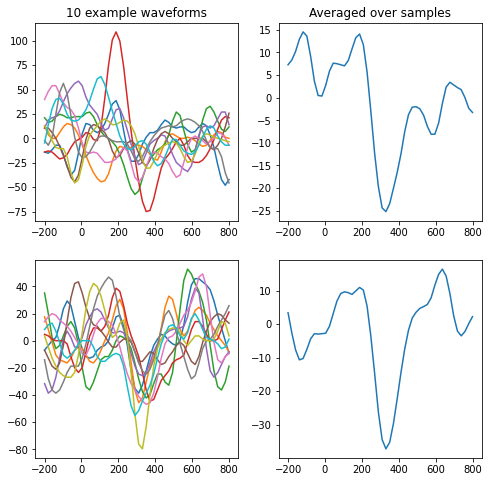

In [15]:
%matplotlib inline
# Consider 1st tetrode and plot some example waveforms

tetrode_id = 0
waves = unit._waveforms[tetrode_id]
print('Tetrode has {} spikes over {} electrodes with {} samples each.'\
      .format(waves.shape[0], waves.shape[1], waves.shape[2]))

N = 10

plt.subplots(figsize=(8, 8))
ax = plt.axes()

x = np.linspace(-200, 800, 50)
for i in range(0,N):
    ax1 = plt.subplot(2, 2, 1)
    ax1.set_title("{} example waveforms".format(N))
    plt.plot(x, waves[i,1,:])
    plt.subplot(2, 2, 3)
    plt.plot(x, waves[i+N,1,:])
ax2 = plt.subplot(2, 2, 2)
ax2.set_title("Averaged over samples")
plt.plot(x, np.mean(waves[0:N,1,:], axis=0))
plt.subplot(2, 2, 4)
plt.plot(x, np.mean(waves[N+1:N+N,1,:], axis=0))

In [14]:
# From https://github.com/HussainiLab/BinConverter/blob/master/BinConverter/core/Tint_Matlab.py

def get_setfile_parameter(parameter, set_filename):
    """
    This function will return the parameter value of a given parameter name for a given set filename.
    Args:
        parameter (str): the name of the set file parameter that you want to obtain.
        set_filename (str): the full path of the .set file that you want to obtain the parameter value from.
    Returns:
        parameter_value (str): the value for the given parameter
    """

    if not os.path.exists(set_filename):
        return

    with open(set_filename, 'r+', encoding='cp1252') as f:
        for line in f:
            if parameter in line:
                if line.split(' ')[0] == parameter:
                    
                    # prevents part of the parameter being in another parameter name
                    new_line = line.strip().split(' ')
                    if len(new_line) == 2:
                        return new_line[-1]
                    else:
                        return ' '.join(new_line[1:])

In [634]:
def parse_generic_header(filename):
    """
    Given a binary file with phrases and line breaks, enters the
    first word of a phrase as dictionary key and the following
    string (without linebreaks) as value. Returns the dictionary.
    """
    header = {}
    with open(filename, 'rb') as f:
        for bin_line in f:
            if b'data_start' in bin_line:
                break
            line = bin_line.decode('cp1252').replace('\r\n', '').replace('\r', '').strip()
            parts = line.split(' ')
            key = parts[0]
            value = ' '.join(parts[1:])
            header[key] = value
            
    return header

In [644]:
test = r.get_header_parameters(filename, 'set')
len(test)

1506

In [648]:
[print(i, k, v) for i, (k, v) in enumerate(test.items())]

0 trial_date Sunday, 4 Oct 2020
1 trial_time 11:07:07
2 experimenter Abid
3 comments 
4 duration 601
5 sw_version 1.2.2.16
6 ADC_fullscale_mv 1500
7 tracker_version 0
8 stim_version 1
9 audio_version 0
10 gain_ch_0 10000
11 filter_ch_0 2
12 a_in_ch_0 0
13 b_in_ch_0 5
14 mode_ch_0 4
15 filtresp_ch_0 0
16 filtkind_ch_0 0
17 filtfreq1_ch_0 0
18 filtfreq2_ch_0 0
19 filtripple_ch_0 0.00
20 filtdcblock_ch_0 0
21 dispmode_ch_0 1
22 channame_ch_0 
23 gain_ch_1 10000
24 filter_ch_1 2
25 a_in_ch_1 1
26 b_in_ch_1 5
27 mode_ch_1 4
28 filtresp_ch_1 0
29 filtkind_ch_1 0
30 filtfreq1_ch_1 0
31 filtfreq2_ch_1 0
32 filtripple_ch_1 0.00
33 filtdcblock_ch_1 0
34 dispmode_ch_1 1
35 channame_ch_1 
36 gain_ch_2 10000
37 filter_ch_2 2
38 a_in_ch_2 2
39 b_in_ch_2 5
40 mode_ch_2 4
41 filtresp_ch_2 0
42 filtkind_ch_2 0
43 filtfreq1_ch_2 0
44 filtfreq2_ch_2 0
45 filtripple_ch_2 0.00
46 filtdcblock_ch_2 0
47 dispmode_ch_2 1
48 channame_ch_2 
49 gain_ch_3 10000
50 filter_ch_3 2
51 a_in_ch_3 3
52 b_in_ch_3 5
53 mod

475 filtdcblock_ch_35 1
476 dispmode_ch_35 1
477 channame_ch_35 
478 gain_ch_36 4000
479 filter_ch_36 2
480 a_in_ch_36 36
481 b_in_ch_36 4
482 mode_ch_36 5
483 filtresp_ch_36 2
484 filtkind_ch_36 0
485 filtfreq1_ch_36 300
486 filtfreq2_ch_36 7000
487 filtripple_ch_36 0.10
488 filtdcblock_ch_36 1
489 dispmode_ch_36 1
490 channame_ch_36 
491 gain_ch_37 4000
492 filter_ch_37 2
493 a_in_ch_37 37
494 b_in_ch_37 4
495 mode_ch_37 5
496 filtresp_ch_37 2
497 filtkind_ch_37 0
498 filtfreq1_ch_37 300
499 filtfreq2_ch_37 7000
500 filtripple_ch_37 0.10
501 filtdcblock_ch_37 1
502 dispmode_ch_37 1
503 channame_ch_37 
504 gain_ch_38 4000
505 filter_ch_38 2
506 a_in_ch_38 38
507 b_in_ch_38 4
508 mode_ch_38 5
509 filtresp_ch_38 2
510 filtkind_ch_38 0
511 filtfreq1_ch_38 300
512 filtfreq2_ch_38 7000
513 filtripple_ch_38 0.10
514 filtdcblock_ch_38 1
515 dispmode_ch_38 1
516 channame_ch_38 
517 gain_ch_39 4000
518 filter_ch_39 2
519 a_in_ch_39 39
520 b_in_ch_39 4
521 mode_ch_39 5
522 filtresp_ch_39 2
523 

1336 saveEEG_ch_55 0
1337 EEG_ch_56 0
1338 saveEEG_ch_56 0
1339 EEG_ch_57 0
1340 saveEEG_ch_57 0
1341 EEG_ch_58 0
1342 saveEEG_ch_58 0
1343 EEG_ch_59 0
1344 saveEEG_ch_59 0
1345 EEG_ch_60 0
1346 saveEEG_ch_60 0
1347 EEG_ch_61 0
1348 saveEEG_ch_61 0
1349 EEG_ch_62 0
1350 saveEEG_ch_62 0
1351 EEG_ch_63 0
1352 saveEEG_ch_63 0
1353 EEG_ch_64 0
1354 saveEEG_ch_64 0
1355 EEGdisplay 0
1356 lightBearing_1 0
1357 lightBearing_2 0
1358 lightBearing_3 0
1359 lightBearing_4 0
1360 artefactReject 1
1361 artefactRejectSave 0
1362 remoteStart 1
1363 remoteChan 16
1364 remoteStop 0
1365 remoteStopChan 14
1366 endBeep 1
1367 recordExtin 1
1368 recordTracker 1
1369 showTracker 1
1370 trackerSerial 0
1371 serialColour 0
1372 recordVideo 1
1373 dacqtrackPos 0
1374 stimSerial 0
1375 recordSerial 0
1376 useScript 0
1377 script C:\Users\Rig-432\Desktop\test.bas
1378 postProcess 0
1379 postProcessor 
1380 postProcessorParams 
1381 dataDir F:\Axona\
1382 sync_out 1
1383 syncRate 1.00000
1384 autoTrial 0
1385 n

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [652]:
re.neo_reader.file_parameters['pretrigSamps']

KeyError: 'pretrigSamps'

In [654]:
re.neo_reader.file_parameters['set']['file_header']['pretrigSamps']

'10'

In [650]:
test['pretrigSamps']
test['spikeLockout']

'40'

In [643]:
len(set_params)

1507

In [636]:
filename

'../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/sample_bin_to_tint/axona_sample.set'

In [641]:
set_params = parse_generic_header(filename)
print(set_params['pretrigSamps'])
print(set_params['spikeLockout'])

10
40


In [ ]:
pre_spike_samples = int(get_setfile_parameter('pretrigSamps', unit_filename+'.set'))
post_spike_samples = int(get_setfile_parameter('spikeLockout', unit_filename+'.set'))

In [ ]:
print('samples pre-spike:', pre_spike_samples)
print('samples post-spike:', post_spike_samples)

In [9]:
end_frame = 10000
start_frame = 0
channel_ids = [0,1,2,3,4,5,14,15]
return_scaled = True

num_frames_traces = end_frame - start_frame
traces = unit._noise_std * np.random.randn(len(channel_ids), num_frames_traces)

channel_idxs = [unit.get_channel_ids().index(ch) for ch in channel_ids]  # not used!

itrc = 0
for (chan_idxs, spike_train, waveform) in zip(unit._channel_indexes, unit._spike_trains, unit._waveforms):
    
    # Find channels on tetrode to include and their indices
    chan_sublist = list(set(channel_idxs) & set(chan_idxs))
    chan_sublist_idxs = [i for i, val in enumerate(chan_idxs) if val in chan_sublist]
    nch = len(chan_sublist_idxs)
                
    spike_times_idxs = np.where((spike_train > start_frame) & (spike_train <= end_frame))
    spike_times_i = spike_train[spike_times_idxs]  # spike_train is in samples (so spike_times_i is too)

    waveforms_i = waveform[spike_times_idxs]
    wf_samples = waveforms_i.shape[2]

    #print((chan_idxs, spike_train[0:3], waveform[0:2,0:2,0:2]))
    
    if chan_sublist:
        
        for t, wf in zip(spike_times_i, waveforms_i):
            
            print(itrc, t, chan_sublist_idxs, nch)
            
            t = t - start_frame

            if t - wf_samples // 2 < 0:
                traces[itrc:itrc+nch, :t + wf_samples // 2] = \
                    wf[chan_sublist_idxs, wf_samples // 2 - t:]
            elif t + wf_samples // 2 > num_frames_traces:
                traces[itrc:itrc+nch, t - wf_samples // 2:] = \
                    wf[chan_sublist_idxs, :num_frames_traces - (t + wf_samples // 2)]
            else:
                traces[itrc:itrc+nch, t - wf_samples // 2:t + wf_samples // 2] = \
                    wf[chan_sublist_idxs, :]
                
        itrc += nch

NameError: name 'unit' is not defined

## Try to implement axonaunitrecordingextractor using Julia's neo implementation

# Pyxona core

In [69]:
"""
Python library for reading Axona files.
Depends on: sys
            os
            glob
            datetime
            numpy
            quantities

Authors: Svenn-Arne Dragly @CINPLA,
         Milad H. Mobarhan @CINPLA,
         Mikkel E. Lepperød @CINPLA
"""

from __future__ import division
from __future__ import print_function
from __future__ import with_statement

import sys
import quantities as pq
import os
import warnings
import glob
import numpy as np
from datetime import datetime


data_end_string = "\r\ndata_end\r\n"
data_end_length = len(data_end_string)

assert(data_end_length == 12)


def parse_attrs(text):
    attrs = {}

    for line in text.split("\n"):
        line = line.strip()

        if len(line) == 0:
            continue

        line_splitted = line.split(" ", 1)

        name = line_splitted[0]
        attrs[name] = None

        if len(line_splitted) > 1:
            try:
                attrs[name] = int(line_splitted[1])
            except:
                try:
                    attrs[name] = float(line_splitted[1])
                except:
                    attrs[name] = line_splitted[1]
    return attrs


def parse_header_and_leave_cursor(file_handle):
    header = ""
    while True:
        search_string = "data_start"
        byte = file_handle.read(1)
        header += str(byte, 'latin-1')

        if not byte:
            raise IOError("Hit end of file before '" + search_string + "' found.")

        if header[-len(search_string):] == search_string:
            break

    attrs = parse_attrs(header)

    return attrs


def assert_end_of_data(file_handle):
    remaining_data = str(file_handle.read(), 'latin1')
    assert(remaining_data.strip() == "data_end")


def scale_analog_signal(value, gain, adc_fullscale_mv, bytes_per_sample):
    """
    Takes value as raw sample data and converts it to millivolts quantity.

    The mapping in the case of bytes_per_sample = 1 is

        [-128, 127] -> [-1.0, (127.0/128.0)] * adc_fullscale_mv / gain (mV)

    The correctness of this mapping has been verified by contacting Axona.
    """
    if type(value) is np.ndarray and value.base is not None:
        raise ValueError("Value passed to scale_analog_signal cannot be a numpy view because we need to convert the entire array to a quantity.")
    max_value = 2**(8 * bytes_per_sample - 1)  # 128 when bytes_per_sample = 1
    result = (value / max_value) * (adc_fullscale_mv / gain)
    result = result
    return result


class Channel:
    def __init__(self, index, name, gain):
        self.index = index
        self.name = name
        self.gain = gain


class ChannelGroup:
    def __init__(self, channel_group_id, filename, channels, adc_fullscale, attrs):
        self.attrs = attrs
        self.filename = filename
        self.channel_group_id = channel_group_id
        self.channels = channels
        self._adc_fullscale = adc_fullscale

    @property
    def analog_signals(self):
        return self.analog_signals

    @property
    def spike_train(self):
        with open(self.filename, "rb") as f:
            attrs = parse_header_and_leave_cursor(f)

            channel_group_index = self.channel_group_id
            bytes_per_timestamp = attrs.get("bytes_per_timestamp", 4)
            bytes_per_sample = attrs.get("bytes_per_sample", 1)
            num_spikes = attrs.get("num_spikes", 0)
            num_chans = attrs.get("num_chans", 1)
            samples_per_spike = attrs.get("samples_per_spike", 50)
            timebase = int(attrs.get("timebase", "96000 hz").split(" ")[0]) * pq.Hz
            sample_rate = attrs.get("rawrate", 48000) * pq.Hz

            bytes_per_spike_without_timestamp = samples_per_spike * bytes_per_sample
            bytes_per_spike = bytes_per_spike_without_timestamp + bytes_per_timestamp

            timestamp_dtype = ">u" + str(bytes_per_timestamp)
            waveform_dtype = "<i" + str(bytes_per_sample)

            dtype = np.dtype([("times", (timestamp_dtype, 1), 1), ("waveforms", (waveform_dtype, 1), samples_per_spike)])

            data = np.fromfile(f, dtype=dtype, count=num_spikes * num_chans)
            assert_end_of_data(f)

        times = data["times"][::4] / timebase  # time for each waveform is the same, so we take each fourth time
        waveforms = data["waveforms"]
        # TODO is this the correct way to reshape waveforms?
        waveforms = waveforms.reshape(num_spikes, num_chans, samples_per_spike)
        waveforms = waveforms.astype(float)

        channel_gain_matrix = np.ones(waveforms.shape)
        for i, channel in enumerate(self.channels):
            channel_gain_matrix[:, i, :] *= channel.gain

        waveforms = scale_analog_signal(waveforms,
                                        channel_gain_matrix,
                                        self._adc_fullscale,
                                        bytes_per_sample)
        # HACK until we find the sign on the signal hafting-fyhn group always have reversed spikes
        waveforms = -waveforms
        # TODO get proper t_stop Mikkel says: isn't that just the duration, Mikkel answers: yes it is
        return SpikeTrain(
            times=times,
            waveforms=waveforms,
            spike_count=num_spikes,
            channel_count=num_chans,
            samples_per_spike=samples_per_spike,
            sample_rate=sample_rate,
            attrs=attrs
        )

    def __str__(self):
        return "<Axona channel_group {}: channel_count: {}>".format(
            self.channel_group_id, len(self.channels)
        )


class SpikeTrain:
    def __init__(self, times, waveforms,
                 spike_count, channel_count, samples_per_spike,
                 sample_rate, attrs):
        self.times = times
        self.waveforms = waveforms
        self.attrs = attrs

        assert(self.waveforms.shape[0] == spike_count)
        assert(self.waveforms.shape[1] == channel_count)
        assert(self.waveforms.shape[2] == samples_per_spike)

        self.spike_count = spike_count
        self.channel_count = channel_count
        self.samples_per_spike = samples_per_spike
        self.sample_rate = sample_rate

    @property
    def num_spikes(self):
        """
        Alias for spike_count, using same name as in .[0-9]* file.
        """
        return self.spike_count

    @property
    def num_chans(self):
        """
        Alias for channel_count, using same name as in .[0-9]* file.
        """
        return self.channel_count


class AnalogSignal:
    def __init__(self, channel_id, signal, sample_rate, attrs):
        self.channel_id = channel_id
        self.signal = signal
        self.sample_rate = sample_rate
        self.attrs = attrs

    def __str__(self):
        return "<Axona analog signal: channel: {}, shape: {}, sample_rate: {}>".format(
            self.channel_id, self.signal.shape, self.sample_rate
        )


class TrackingData:
    def __init__(self, times, positions, attrs):
        self.attrs = attrs
        self.times = times
        self.positions = positions

    def __str__(self):
        return "<Axona tracking data: times shape: {}, positions shape: {}>".format(
            self.times.shape, self.positions.shape
        )


class InpData:
    def __init__(self, duration, times, event_types, values):
        self.duration = duration
        self.times = times
        self.event_types = event_types
        self.values = values

    def __str__(self):
        return "<Axona inp data: times shape: {}>".format(self.times.shape)


class CutData:
    def __init__(self, channel_group_id, indices):
        self.channel_group_id = channel_group_id
        self.indices = indices

    def __str__(self):
        return "<Axona cut data: channel group id: {}, indices shape: {}>".format(
            self.channel_group_id, self.indices.shape
        )


class File:
    """
    Class for reading experimental data from an Axona dataset.
    """
    def __init__(self, filename):
        self._absolute_filename = filename
        self._path, relative_filename = os.path.split(filename)
        self._base_filename, extension = os.path.splitext(relative_filename)

        if extension != ".set":
            raise ValueError("file extension must be '.set'")

        with open(self._absolute_filename, mode="r", encoding="cp1252") as f:
            text = f.read()

        attrs = parse_attrs(text)

        self._adc_fullscale = float(attrs["ADC_fullscale_mv"]) * 1000.0 * pq.uV
        if all(key in attrs for key in ['trial_date', 'trial_time']):
            self._start_datetime = datetime.strptime(attrs['trial_date'] +
                                                     attrs['trial_time'],
                                                     '%A, %d %b %Y%H:%M:%S')
        else:
            self._start_datetime = None
        self._duration = float(attrs["duration"]) * pq.s
        self._tracked_spots_count = int(attrs["tracked_spots"])
        self.attrs = attrs

        self._channel_groups = []
        self._analog_signals = []
        self._cuts = []
        self._inp_data = None
        self._tracking = None

        self._channel_groups_dirty = True
        self._analog_signals_dirty = True
        self._cuts_dirty = True
        self._inp_data_dirty = True
        self._tracking_dirty = True

    @property
    def session(self):
        return self._base_filename

    @property
    def related_files(self):
        file_path = os.path.join(self._path, self._base_filename)
        cut_files = glob.glob(os.path.join(file_path + "_[0-9]*.cut"))

        return glob.glob(os.path.join(file_path + ".*")) + cut_files

    def channel_group(self, channel_id):
        if self._channel_groups_dirty:
            self._read_channel_groups()

        return self._channel_id_to_channel_group[channel_id]

    @property
    def channel_groups(self):
        if self._channel_groups_dirty:
            self._read_channel_groups()

        return self._channel_groups

    @property
    def analog_signals(self):
        if self._analog_signals_dirty:
            self._read_analog_signals()

        return self._analog_signals

    @property
    def tracking(self):
        if self._tracking_dirty:
            self._read_tracking()

        return self._tracking

    @property
    def inp_data(self):
        if self._inp_data_dirty:
            self._read_inp_data()

        return self._inp_data

    @property
    def cuts(self):
        if self._cuts_dirty:
            self._read_cuts()

        return self._cuts

    def _read_channel_groups(self):
        self._channel_id_to_channel_group = {}
        self._channel_group_id_to_channel_group = {}
        self._channel_count = 0
        self._channel_groups = []

        # TODO this file reading can be removed, perhaps?
        channel_group_filenames = glob.glob(
            os.path.join(self._path, self._base_filename) + ".[0-9]*")
        channel_group_filenames = sorted(
            channel_group_filenames,
            key=lambda x: os.path.splitext(x)[1][1:])

        _, extension = os.path.splitext(channel_group_filenames[0])
        start_channel_group = int(extension[1:]) - 1
        if start_channel_group != 0:
            warnings.warn(
                'Channel group file starts at {} '.format(start_channel_group) +
                'assumes that channel groups not saved have the same channel ' +
                'count and infers channel ids from that.')
            with open(channel_group_filenames[0], "rb") as f:
                channel_group_attrs = parse_header_and_leave_cursor(f)
                num_chans = channel_group_attrs["num_chans"]
                self._channel_count = (start_channel_group + 1) * num_chans

        for ii, channel_group_filename in enumerate(channel_group_filenames, start_channel_group):
            # increment before, because channel_groups start at 1
            basename, extension = os.path.splitext(channel_group_filename)
            channel_group_id = int(extension[1:]) - 1
            if ii != channel_group_id:
                raise IOError('Missing channel group file, unable to map channel ids')
            with open(channel_group_filename, "rb") as f:
                channel_group_attrs = parse_header_and_leave_cursor(f)
                num_chans = channel_group_attrs["num_chans"]
                channels = []
                for i in range(num_chans):
                    channel_id = self._channel_count + i
                    channel = Channel(
                        channel_id,
                        name="channel_{}_channel_group_{}_internal_{}".format(
                            channel_id, channel_group_id, i),
                        gain=self._channel_gain(channel_group_id, i)
                    )
                    channels.append(channel)

                channel_group = ChannelGroup(
                    channel_group_id,
                    filename=channel_group_filename,
                    channels=channels,
                    adc_fullscale=self._adc_fullscale,
                    attrs=channel_group_attrs
                )

                self._channel_groups.append(channel_group)
                self._channel_group_id_to_channel_group[channel_group_id] = channel_group

                for i in range(num_chans):
                    channel_id = self._channel_count + i
                    self._channel_id_to_channel_group[channel_id] = channel_group

                # increment after, because channels start at 0
                self._channel_count += num_chans

        # TODO add channels only for files that exist
        self._channel_ids = np.arange(self._channel_count)
        self._channel_groups_dirty = False

    def _channel_gain(self, channel_group_index, channel_index):
        # TODO split into two functions, one for mapping and one for gain lookup
        global_channel_index = channel_group_index * 4 + channel_index
        param_name = "gain_ch_{}".format(global_channel_index)
        return float(self.attrs[param_name])

    def _read_inp_data(self):
        """
        Reads axona .inp files.
        Event type can be 'I', 'O', or 'K' representing input,
        output, and keypress, respectively.
        The value of all event types is assumed to have dtype='>i',
        even though this is not true for keypress.
        """
        inp_filename = os.path.join(self._path, self._base_filename + ".inp")
        if not os.path.exists(inp_filename):
            raise IOError("'.inp' file not found:" + inp_filename)

        with open(inp_filename, "rb") as f:
            attrs = parse_header_and_leave_cursor(f)

            sample_rate_split = attrs["timebase"].split(" ")
            assert(sample_rate_split[1] == "hz")
            sample_rate = float(sample_rate_split[0]) * pq.Hz  # sample_rate 50.0 hz

            duration = float(attrs["duration"]) * pq.s
            num_inp_samples = int(attrs["num_inp_samples"])
            bytes_per_timestamp = int(attrs["bytes_per_timestamp"])
            bytes_per_type = int(attrs["bytes_per_type"])
            bytes_per_value = int(attrs["bytes_per_value"])

            timestamp_dtype = ">i" + str(bytes_per_timestamp)
            type_dtype = "S"
            value_dtype = 'i1'

            # read data:
            dtype = np.dtype([("t", (timestamp_dtype, 1)),
                              ("event_types", (type_dtype, bytes_per_type)),
                              ("values", (value_dtype, bytes_per_value))])

            # num_inp_samples cannot be used because it
            # does not include outputs ('O').
            # We need to find the length of the data manually
            # by seeking to the end of the file and subtracting
            # the position at data_start.
            current_position = f.tell()
            f.seek(-data_end_length, os.SEEK_END)
            end_position = f.tell()
            data_byte_count = end_position - current_position
            data_count = int(data_byte_count / dtype.itemsize)
            assert_end_of_data(f)

            # seek back to data start and read the newly calculated
            # number of samples
            f.seek(current_position, os.SEEK_SET)

            data = np.fromfile(f, dtype=dtype, count=data_count)

            assert_end_of_data(f)
            times = data["t"].astype(float) / sample_rate

            inp_data = InpData(
                duration=duration,
                times=times,
                event_types=data["event_types"].astype(str),
                values=data["values"],
            )

        self._inp_data = inp_data
        self._inp_data_dirty = False

    def _read_tracking(self):
        pos_filename = os.path.join(self._path, self._base_filename + ".pos")
        if not os.path.exists(pos_filename):
            raise IOError("'.pos' file not found:" + pos_filename)

        with open(pos_filename, "rb") as f:
            attrs = parse_header_and_leave_cursor(f)

            sample_rate_split = attrs["sample_rate"].split(" ")
            assert(sample_rate_split[1] == "hz")
            sample_rate = float(sample_rate_split[0]) * pq.Hz  # sample_rate 50.0 hz

            eeg_samples_per_position = float(attrs["EEG_samples_per_position"])
            pos_samples_count = int(attrs["num_pos_samples"])
            bytes_per_timestamp = int(attrs["bytes_per_timestamp"])
            bytes_per_coord = int(attrs["bytes_per_coord"])

            timestamp_dtype = ">i" + str(bytes_per_timestamp)
            coord_dtype = ">i" + str(bytes_per_coord)

            bytes_per_pixel_count = 4
            pixel_count_dtype = ">i" + str(bytes_per_pixel_count)

            # pos_format is as follows for this file t,x1,y1,x2,y2,numpix1,numpix2.
            data_spots_count = 2
            assert attrs['pos_format'] == 't,x1,y1,x2,y2,numpix1,numpix2', (
                'We only support the given pos format')
            # read data:
            dtype = np.dtype([("t", (timestamp_dtype, 1)),
                             ("coords", (coord_dtype, 1), 2 * data_spots_count),
                             ("pixel_count", (pixel_count_dtype, 1), data_spots_count)])

            data = np.fromfile(f, dtype=dtype, count=pos_samples_count)

            try:
                assert_end_of_data(f)
            except AssertionError:
                warnings.warn("Found remaining data while parsing pos file")

            time_scale = float(attrs["timebase"].split(" ")[0]) * pq.Hz
            times = data["t"].astype(float) / time_scale

            window_min_x = float(attrs["window_min_x"])
            window_max_x = float(attrs["window_max_x"])
            window_min_y = float(attrs["window_min_y"])
            window_max_y = float(attrs["window_max_y"])
            xsize = window_max_x - window_min_x
            ysize = window_max_y - window_min_y
            length_scale = [xsize, ysize, xsize, ysize]
            coords = data["coords"].astype(float) * pq.m
            # dacq doc: positions with value 1023 are missing
            coords[data["coords"] == 1023] = np.nan * pq.m
            for i in range(2 * data_spots_count):
                coords[:, i] /= length_scale[i]

            tracking_data = TrackingData(
                times=times,
                positions=coords,
                attrs=attrs
            )

        self._tracking = tracking_data
        self._tracking_dirty = False

    def _read_analog_signals(self):
        # TODO read for specific channel
        # TODO check that .egf file exists

        self._analog_signals = []
        eeg_basename = os.path.join(self._path, self._base_filename)
        eeg_files = glob.glob(eeg_basename + ".eeg")
        eeg_files += glob.glob(eeg_basename + ".eeg[0-9]*")
        eeg_files += glob.glob(eeg_basename + ".egf")
        eeg_files += glob.glob(eeg_basename + ".egf[0-9]*")
        for eeg_filename in sorted(eeg_files):
            extension = os.path.splitext(eeg_filename)[-1][1:]
            file_type = extension[:3]
            suffix = extension[3:]
            if suffix == "":
                suffix = "1"
            suffix = int(suffix)
            with open(eeg_filename, "rb") as f:
                try:
                    attrs = parse_header_and_leave_cursor(f)
                except OSError as e:
                    warnings.warn(str(e) + ' Unable to load "' + eeg_filename +
                                  '".')
                    continue
                attrs["raw_filename"] = eeg_filename

                if file_type == "eeg":
                    sample_count = int(attrs["num_EEG_samples"])
                elif file_type == "egf":
                    sample_count = int(attrs["num_EGF_samples"])
                else:
                    raise IOError("Unknown file type. Should be .eeg or .efg.")

                sample_rate_split = attrs["sample_rate"].split(" ")
                bytes_per_sample = attrs["bytes_per_sample"]
                assert(sample_rate_split[1].lower() == "hz")
                sample_rate = float(sample_rate_split[0]) * pq.Hz  # sample_rate 250.0 hz

                sample_dtype = (('<i' + str(bytes_per_sample), 1), attrs["num_chans"])
                data = np.fromfile(f, dtype=sample_dtype, count=sample_count)
                assert_end_of_data(f)

                eeg_final_channel_id = self.attrs["EEG_ch_" + str(suffix)] - 1 # EEG channels are counted from 1, other channels are from 0
                if eeg_final_channel_id == -1:
                    warnings.warn(
                        'eeg saved, but not reffering to any channel' +
                        ' skipping {}'.format(eeg_filename))
                    continue
                assert self.attrs["saveEEG_ch_" + str(suffix)] == 1
                eeg_mode = self.attrs["mode_ch_" + str(eeg_final_channel_id)]
                if eeg_mode == 0: # signal
                    eeg_original_channel_id = eeg_final_channel_id
                elif eeg_mode == 1: # ref
                    ref_id = self.attrs["b_in_ch_" + str(eeg_final_channel_id)]
                    eeg_original_channel_id = self.attrs["ref_" + str(ref_id)]
                elif eeg_mode == 2: # what mode is this??
                    other_channel = self.attrs["b_in_ch_" + str(eeg_final_channel_id)]
                    ref_id = self.attrs["b_in_ch_" + str(other_channel)]
                    eeg_original_channel_id = self.attrs["ref_" + str(ref_id)]
                    warnings.warn(
                        'Not sure how to retrieve original channel from mode ' +
                        '{} in {}. '.format(eeg_mode, eeg_filename) +
                        'Please make sure it is the correct gain and channel_id.')
                else:
                    warnings.warn(
                        'Not sure how to retrieve original channel from mode ' +
                        '{}, skipping {}'.format(eeg_mode, eeg_filename))
                    continue

                attrs["channel_id"] = eeg_original_channel_id

                gain = self.attrs["gain_ch_{}".format(eeg_final_channel_id)]

                signal = scale_analog_signal(data,
                                             gain,
                                             self._adc_fullscale,
                                             bytes_per_sample)

                # TODO read start time

                analog_signal = AnalogSignal(
                    channel_id=eeg_original_channel_id,
                    signal=signal,
                    sample_rate=sample_rate,
                    attrs=attrs
                )

                self._analog_signals.append(analog_signal)

        self._analog_signals_dirty = False

    def _read_cuts(self):
        self._cuts = []
        cut_basename = os.path.join(self._path, self._base_filename)
        cut_files = glob.glob(cut_basename + "_[0-9]*.cut")

        if not len(cut_files) > 0:
            raise IOError("'.cut' file(s) not found")

        for cut_filename in sorted(cut_files):
            split_basename = os.path.basename(cut_filename).split(self._base_filename+"_")[-1]
            suffix = os.path.splitext(split_basename)[0]
            try:
                channel_group_id = int(suffix) - 1  # -1 to match channel_group_id
            except ValueError as e:
                warnings.warn(str(e) + ' Unable to load cut file "' +
                              cut_filename + '".')
                continue
            lines = ""
            with open(cut_filename, "r") as f:
                for line in f:
                    if line.lstrip().startswith('Exact_cut_for'):
                        break
                lines = f.read()
                lines = lines.replace("\n", "").strip()
                indices = []
                try:
                    indices += [int(b) for b in lines.split(' ')
                                if b.isnumeric()]
                except Exception as e:
                    raise(type(e)(str(e) +
                                  " Invalid indices in cut file '" +
                                  cut_filename + "'."
                          ).with_traceback(sys.exc_info()[2]))
                cut = CutData(
                    channel_group_id=channel_group_id,
                    indices=np.asarray(indices, dtype=np.int)
                )
                self._cuts.append(cut)

        self._cuts_dirty = False


# Read data with Hussaini lab code for comparison (should give same answer)

In [30]:
# mini sample data
dir_name1 = r'../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_units/Axona_Unit_Mode_SmallFile'
base_filename1 = '20140815-180secs'
filename1 = os.path.join(dir_name1, base_filename1)

# 1ms sample data
dir_name2 = r'../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms'
base_filename2 = '20201004_Tint'
filename2 = os.path.join(dir_name2, base_filename2)

print(filename1)  # shows waveform centered at ~sample 10
print(filename2)  # shows waveform centered at ~sample 25


# Set directory and filename

dir_name = dir_name2
base_filename = base_filename2

unit_set_file = os.path.join(dir_name, base_filename + '.set')
unit_eeg_file = os.path.join(dir_name, base_filename + '.eeg')
unit_pos_file = os.path.join(dir_name, base_filename + '.pos')
unit_num_file1 = os.path.join(dir_name, base_filename + '.1')
unit_num_file2 = os.path.join(dir_name, base_filename + '.2')
unit_num_file3 = os.path.join(dir_name, base_filename + '.3')
unit_num_file4 = os.path.join(dir_name, base_filename + '.4')

print('Reading UNIT data files:')
print(unit_set_file)
print(unit_eeg_file)
print(unit_pos_file)
print(unit_num_file1)
print(unit_num_file2)
print(unit_num_file3)
print(unit_num_file4)

../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_units/Axona_Unit_Mode_SmallFile/20140815-180secs
../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms/20201004_Tint
Reading UNIT data files:
../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms/20201004_Tint.set
../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms/20201004_Tint.eeg
../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms/20201004_Tint.pos
../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms/20201004_Tint.1
../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms/20201004_Tint.2
../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms/20201004_Tint.3
../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/Axona_Tint_1ms/20201004_Tint.4


In [26]:
unit_num_file1 = tetrode_file

In [64]:
with open(unit_num_file1, 'rb') as f:
    data_head = f.read(800)
    
data_start = data_head.find(b'data_start') + len('data_start')
print(data_start)

286


In [28]:
print(data_head.decode('cp1252')[data_start-10:data_start])
print(data_head[data_start:])

data_start
b'\x00\x00\x03\xa0\xf9\x02\x12$165344,\x1d\x11\n\x04\xfc\xf0\xe9\xec\xf9\xf9\x15\x1b\x1b\x16\x0b\xfe\xf4\xf1\xf3\xf4\xf4\xf9\x02\x0b\x12\x14\x10\t\x02\x00\x02\x08\x0e\x13\x19 !\x1a\x0f\x00\x00\x03\xa0\xfa\xfe\x01\x08\x14\x1e%,4<</\x1b\n\x00\xfb\xf0\xe1\xd7\xd8\xe1\xeb\xf2\xf7\xf9\xfb\x00\x04\x06\x03\xfa\xec\xe1\xe1\xeb\xf8\x00\x02\xfe\xf8\xf7\xfd\x04\x08\t\r\x14\x19\x19\x16\x00\x00\x03\xa0\xfe\x03\x0e\x1a#$ \x1e %% \x1a\x15\x10\x02\xec\xd3\xc8\xce\xe1\xf7\x06\x0c\x0c\x0c\r\x0b\x06\x00\xf8\xf2\xf4\xfe\n\x13\x13\t\xfb\xee\xe8\xeb\xf4\x00\n\x14\x1c\x1e\x18\x0e\x00\x00\x03\xa0\xee\xfa\r +*%"&050(%$\x1e\x0e\xfe\xf8\x01\x14%2;:)\x0b\xea\xd2\xc8\xcb\xd8\xea\xfd\x0c\x12\x0e\x02\xf3\xea\xe8\xed\xf5\xff\n\x14\x19\x16\n\xfd\x00\x00\x06%\x04\xfd\xf5\xf9\t\x1f4AE=,\x16\x06\x00\x03\x07\x08\x05\xff\xf9\xf8\xfc\x01\x03\x00\xf3\xde\xcc\xc6\xcf\xe0\xf2\xfe\x02\x04\t\x10\x16\x1a\x1a\x1d\x17\x0e\x04\x04\xf3\xf2\xf5\xf6\xf4\x00\x00\x06%\x1c\x16\x08\xfd\xfa\x01\x0e\x1d,9></\x1c\x07\xf9\xf1\xf0\xf

In [29]:
header = parse_generic_header(unit_num_file1)

In [30]:
header

{'trial_date': 'Sunday, 4 Oct 2020',
 'trial_time': '11:07:07',
 'experimenter': 'Abid',
 'comments': '',
 'duration': '601',
 'sw_version': '1.2.2.16',
 'num_chans': '4',
 'timebase': '96000 hz',
 'bytes_per_timestamp': '4',
 'samples_per_spike': '50',
 'sample_rate': '48000 hz',
 'bytes_per_sample': '1',
 'spike_format': 't,ch1,t,ch2,t,ch3,t,ch4',
 'num_spikes': '159'}

In [31]:
num_chans = int(header.get('num_chans', 4))
samples_per_spike = int(header.get('samples_per_spike', 50))
bytes_per_timestamp = int(header.get('bytes_per_timestamp', 4))
bytes_per_sample = int(header.get('bytes_per_sample', 1))
bytes_per_packet = (bytes_per_timestamp + bytes_per_sample*samples_per_spike) * num_chans

In [32]:
bytes_per_packet

216

In [33]:
r.file_parameters['unit']['data_type']

dtype([('spiketime', '>i4'), ('samples', 'i1', (50,))])

In [34]:
time_mm = np.memmap(unit_num_file1, 
                    dtype='int'+str(int(bytes_per_timestamp)*8), 
                    mode='r', 
                    offset=data_start)

spike_mm = np.memmap(unit_num_file1, 
                     dtype='int'+str(int(bytes_per_sample)*8), 
                     mode='r', 
                     offset=data_start)

In [35]:
N = 100
offs = bytes_per_timestamp

my_waves = np.zeros((N, samples_per_spike))
for i in range(0, N):
    my_waves[i,:] = spike_mm[offs+(i*bytes_per_packet):offs+samples_per_spike+(i*bytes_per_packet)]

In [38]:
my_waves.shape

(100, 50)

In [418]:
def plot_spike_waveforms(waves, N=10):

    # Consider 1st tetrode and plot some example waveforms
    plt.subplots(figsize=(8, 8))
    ax = plt.axes()

    x = np.linspace(-200, 800, 50)
    for i in range(0,N):
        ax1 = plt.subplot(2, 2, 1)
        ax1.set_title("10 example waveforms")
        plt.plot(x, waves[i,:])
    ax2 = plt.subplot(2, 2, 2)
    ax2.set_title("Averaged over samples")
    plt.plot(x, np.mean(waves[0:N,:], axis=0))

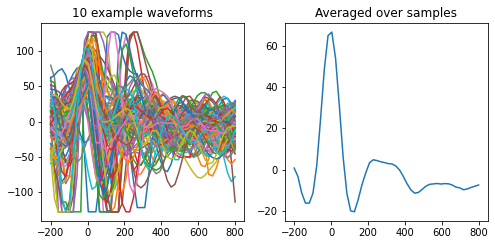

In [37]:
plot_spike_waveforms(my_waves, N=N)

Tetrode has 152938 spikes over 4 electrodes with 50 samples each.


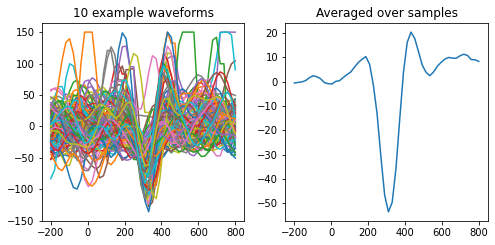

In [42]:
tetrode_id = 0
waves = unit._waveforms[tetrode_id]
print('Tetrode has {} spikes over {} electrodes with {} samples each.'\
      .format(waves.shape[0], waves.shape[1], waves.shape[2]))

plot_spike_waveforms(np.squeeze(waves[:,0,:]), N=100)

In [46]:
my_avg_wave = np.mean(my_waves[0:N,:], axis=0)
pyxona_avg_wave = np.mean(waves[0:N,0,:], axis=0)

np.array_equal(my_avg_wave, -pyxona_avg_wave)

False

In [47]:
-pyxona_avg_wave

array([  0.57421875,   0.3515625 ,   0.140625  ,  -0.41015625,
        -1.5703125 ,  -2.37890625,  -1.9921875 ,  -1.1484375 ,
         0.41015625,   0.8671875 ,   1.0078125 ,  -0.0703125 ,
        -0.36328125,  -1.65234375,  -2.87109375,  -3.9375    ,
        -5.953125  ,  -7.83984375,  -9.2109375 , -10.27734375,
        -7.125     ,   1.34765625,  13.34765625,  30.7265625 ,
        46.65234375,  53.56640625,  49.69921875,  35.89453125,
        15.64453125,  -3.7734375 , -16.1484375 , -20.34375   ,
       -17.73046875, -12.2578125 ,  -6.73828125,  -3.80859375,
        -2.42578125,  -3.94921875,  -6.26953125,  -7.921875  ,
        -9.24609375,  -9.92578125,  -9.64453125,  -9.59765625,
       -10.59375   , -11.25      , -10.76953125,  -9.05859375,
        -8.953125  ,  -8.296875  ]) * uV

In [48]:
my_avg_wave

array([  0.49,   0.3 ,   0.12,  -0.35,  -1.34,  -2.03,  -1.7 ,  -0.98,
         0.35,   0.74,   0.86,  -0.06,  -0.31,  -1.41,  -2.45,  -3.36,
        -5.08,  -6.69,  -7.86,  -8.77,  -6.08,   1.15,  11.39,  26.22,
        39.81,  45.71,  42.41,  30.63,  13.35,  -3.22, -13.78, -17.36,
       -15.13, -10.46,  -5.75,  -3.25,  -2.07,  -3.37,  -5.35,  -6.76,
        -7.89,  -8.47,  -8.23,  -8.19,  -9.04,  -9.6 ,  -9.19,  -7.73,
        -7.64,  -7.08])

In [51]:
print(2**7)
print(2**(8*2-1))

128
32768


### Unit mode

In unit mode, data is stored in 1 ms chunks, 200 μs and 800 μs after a threshold event. The header will contain a setting called “spike_format”. Generally, there are 216 bytes per spike, structured as 54 bytes per channel, in order by channel number (so, for tetrode 1, the channels are in the order 1, 2, 3, 4, or actually 1a, 1b, 1c, 1d in dacq2 nomenclature, etc.). The 54 bytes consist of a 4 byte time stamp (most significant byte first), then 50 8-bit samples. The ASCII header specifies you how many spikes there should be in the file (“num_spikes”), and the “timebase” of the timestamps (almost always 96 kHz, which means the 4-byte timestamp value needs to be divided by 96000 to get a time in seconds). The samples themselves are normally collected at 48 kHz (again, specified in the header).
Tetrode and stereotrode data is almost identical, in that both store 4-channels worth of data per spike. The only difference is that in stereotrode mode, either channels 3&4 or 1&2 will be all zeroes, corresponding to a spike on stereotrode 1 or 2, respectively (the stereotrode format is very wasteful of file space).

In [377]:
data

memmap([  0,   0,   1, ..., 100,  13,  10], dtype=int8)